###                  BSFI- Credit Risk (LGD) 

### Problem statement

Expected credit loss (ECL) computation is a method used in credit risk management to determine the amount of loss a bank is expected to incur in the event a borrower defaults on their loan. Different banks may use different methodologies for calculating the expected credit loss (ECL) and provisioning. rk of a bank.

ECL method is used for provisioning the capital buffer to protect banks against possible default of the customers. The ECL provisioning is a mandatory accounting principle set by the Basel III norms.

The Basel norms, also known as the Basel Accords or Basel Regulations, are a set of international regulatory standards for the banking industry. These norms were developed by the Basel Committee on Banking Supervision, which is an international committee of banking supervisors from around the world. The committee was formed in 1974 by the central bank governors of the Group of Ten (G-10) countries. The history of the Basel norms can be traced back to the late 1970s and early 1980s when the banking industry was facing a series of crises and failures. These crises were caused by a combination of factors, including insufficient capital and liquidity, inadequate risk management and weak supervisory oversight. In response to these crises, the Basel Committee began to develop a set of international standards for bank capital and risk management to strengthen the resilience of the global banking system and reduce the risk of bank failures.

The loss given default (LGD) is a measure of the amount of loss that a bank is expected to incur in the event of a default by a borrower. In a dataset containing the historical data of loans defaulted, such as the value of the collateral (if any), loan tenure, number of missed repayments, etc. the bank tries to estimate the approximate amount that it stands to lose if a borrower defaults. It might seem evident that this can be directly calculated by subtracting the collateral amount and the repayments received against the loan from the present outstanding loan amount. However, banks make collection efforts even after a borrower has defaulted. Therefore, the LGD is estimated using historical data from the default loan base using statistical methods.

In [15]:
#Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore") 

## Step 1: Reading, understanding and visualizating the data

In [3]:
#Import the datasets
main = pd.read_csv("main_loan_base.csv")
monthly = pd.read_csv("monthly_balance_base.csv")
repayment = pd.read_csv("repayment_base.csv")

In [5]:
#Import the test datasets
test_main = pd.read_csv("test_main_loan_base.csv")
test_monthly = pd.read_csv("test_monthly_balance_base.csv")
test_repayment = pd.read_csv("test_repayment_base.csv")

In [6]:
main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_acc_num       50000 non-null  object 
 1   customer_name      50000 non-null  object 
 2   customer_address   50000 non-null  object 
 3   loan_type          50000 non-null  object 
 4   loan_amount        50000 non-null  int64  
 5   collateral_value   50000 non-null  float64
 6   cheque_bounces     50000 non-null  int64  
 7   number_of_loans    50000 non-null  int64  
 8   missed_repayments  50000 non-null  int64  
 9   vintage_in_months  50000 non-null  int64  
 10  tenure_years       50000 non-null  int64  
 11  interest           50000 non-null  float64
 12  monthly_emi        50000 non-null  float64
 13  disbursal_date     50000 non-null  object 
 14  default_date       50000 non-null  object 
dtypes: float64(3), int64(6), object(6)
memory usage: 5.7+ MB


In [7]:
main.head()

loan_acc_num  customer_name                         customer_address  \
0   LN79307711     Aarna Sura        09/506, Anand Path, Ongole 646592   
1   LN88987787    Amira Konda      11, Dhaliwal Circle\nRaichur 659460   
2   LN78096023  Eshani Khosla   H.No. 31\nAtwal Street\nKatihar-037896   
3   LN56862431     Divij Kala     766, Gulati Marg\nPudukkottai-051396   
4   LN77262680    Vaibhav Bir  55/73, Sachdev Marg\nDharmavaram-332966   

          loan_type  loan_amount  collateral_value  cheque_bounces  \
0  Consumer-Durable        21916           4929.47               3   
1       Two-Wheeler       121184          10254.50               1   
2               Car       487036         116183.86               0   
3       Two-Wheeler        52125          10310.05               5   
4  Consumer-Durable         8635           1051.25               0   

   number_of_loans  missed_repayments  vintage_in_months  tenure_years  \
0                0                  3                127             2   
1                0                  0                156             2   
2                1                 10                 22             3   
3                2                  9                 30             2   
4                1                  3                 62             2   

   interest  monthly_emi disbursal_date default_date  
0      10.1      1012.32     2019-04-14   2020-07-31  
1      11.8      5693.24     2015-04-14   2016-07-30  
2      14.6     16788.02     2015-01-10   2015-04-18  
3       9.6      2395.69     2018-02-07   2018-09-13  
4       9.6       396.87     2014-12-25   2016-02-20

In [8]:
# Check if the dataset has duplicates
main['loan_acc_num'].nuniquenique()

49985

In [10]:
main.shape

(50000, 15)

In [11]:
# There are 15 duplicate entires in the load account number, Will remove the duplicate record and keep the original

main = main[~ main['loan_acc_num'].duplicated()]
print(main.shape)

(49985, 15)


In [16]:
# To correct the incorrect data types in the column

main['disbursal_date'] = pd.to_datetime(main['disbursal_date'])
main['default_date'] = pd.to_datetime(main['default_date'])

In [17]:
main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49985 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   loan_acc_num       49985 non-null  object        
 1   customer_name      49985 non-null  object        
 2   customer_address   49985 non-null  object        
 3   loan_type          49985 non-null  object        
 4   loan_amount        49985 non-null  int64         
 5   collateral_value   49985 non-null  float64       
 6   cheque_bounces     49985 non-null  int64         
 7   number_of_loans    49985 non-null  int64         
 8   missed_repayments  49985 non-null  int64         
 9   vintage_in_months  49985 non-null  int64         
 10  tenure_years       49985 non-null  int64         
 11  interest           49985 non-null  float64       
 12  monthly_emi        49985 non-null  float64       
 13  disbursal_date     49985 non-null  datetime64[ns]
 14  defaul

In [18]:
# Do the necessary checks in the test data set

test_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_acc_num       10000 non-null  object 
 1   customer_name      10000 non-null  object 
 2   customer_address   10000 non-null  object 
 3   loan_type          10000 non-null  object 
 4   loan_amount        10000 non-null  int64  
 5   collateral_value   10000 non-null  float64
 6   cheque_bounces     10000 non-null  int64  
 7   number_of_loans    10000 non-null  int64  
 8   missed_repayments  10000 non-null  int64  
 9   vintage_in_months  10000 non-null  int64  
 10  tenure_years       10000 non-null  int64  
 11  interest           10000 non-null  float64
 12  monthly_emi        10000 non-null  float64
 13  disbursal_date     10000 non-null  object 
 14  default_date       10000 non-null  object 
dtypes: float64(3), int64(6), object(6)
memory usage: 1.1+ MB


In [19]:
# Check the unique rows in test main dataset
print(f'unique values in loan_acc_num: {test_main["loan_acc_num"].nunique()}')
print(f'main shape : {test_main.shape}')

unique values in loan_acc_num: 9997
main shape : (10000, 15)


In [20]:
# There are duplicates in Main dataset i.e multiple entries for same loan account number. We will keep only 1 record per account number therefore deleting the duplicates.
test_main = test_main[~ test_main['loan_acc_num'].duplicated()]
print(test_main.shape)

(9997, 15)


In [21]:
# Correct the data type of date columns in the test dataset 
test_main['disbursal_date'] = pd.to_datetime(test_main['disbursal_date'])
test_main['default_date'] = pd.to_datetime(test_main['default_date'])

In [22]:
test_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9997 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   loan_acc_num       9997 non-null   object        
 1   customer_name      9997 non-null   object        
 2   customer_address   9997 non-null   object        
 3   loan_type          9997 non-null   object        
 4   loan_amount        9997 non-null   int64         
 5   collateral_value   9997 non-null   float64       
 6   cheque_bounces     9997 non-null   int64         
 7   number_of_loans    9997 non-null   int64         
 8   missed_repayments  9997 non-null   int64         
 9   vintage_in_months  9997 non-null   int64         
 10  tenure_years       9997 non-null   int64         
 11  interest           9997 non-null   float64       
 12  monthly_emi        9997 non-null   float64       
 13  disbursal_date     9997 non-null   datetime64[ns]
 14  default_

In [23]:
monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4002490 entries, 0 to 4002489
Data columns (total 3 columns):
 #   Column          Dtype  
---  ------          -----  
 0   loan_acc_num    object 
 1   date            object 
 2   balance_amount  float64
dtypes: float64(1), object(2)
memory usage: 91.6+ MB


In [24]:
monthly.head()

loan_acc_num        date  balance_amount
0   LN79307711  2010-03-26      407.343213
1   LN79307711  2010-04-25      545.431227
2   LN79307711  2010-05-25      861.932145
3   LN79307711  2010-06-24      562.082133
4   LN79307711  2010-07-24       37.768861

In [25]:
# Have loan_acc_num and average of monthly amount agaist each loan_acc_num

monthly = monthly.groupby('loan_acc_num')['balance_amount'].mean().reset_index()
monthly['balance_amount'] = round(monthly['balance_amount'],2)
monthly = monthly.rename(columns = {'balance_amount' : 'avg_monthly_balance_amount'})

print(monthly.shape)

(49671, 2)


In [26]:
monthly.head()

loan_acc_num  avg_monthly_balance_amount
0   LN10000701                     2301.88
1   LN10001077                     2296.28
2   LN10004116                     8887.38
3   LN10007976                     9420.56
4   LN10010204                     6446.21

In [27]:
monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49671 entries, 0 to 49670
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_acc_num                49671 non-null  object 
 1   avg_monthly_balance_amount  49671 non-null  float64
dtypes: float64(1), object(1)
memory usage: 776.2+ KB


In [28]:
test_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801407 entries, 0 to 801406
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   loan_acc_num    801407 non-null  object 
 1   date            801407 non-null  object 
 2   balance_amount  801407 non-null  float64
dtypes: float64(1), object(2)
memory usage: 18.3+ MB


In [29]:
# Create a dataframe with loan acc num and avg monthly balance

test_monthly = test_monthly.groupby('loan_acc_num')['balance_amount'].mean().reset_index()
test_monthly['balance_amount'] = round(test_monthly['balance_amount'],2)
test_monthly = test_monthly.rename(columns = {'balance_amount' : 'avg_monthly_balance_amount'})
test_monthly.head()

loan_acc_num  avg_monthly_balance_amount
0   LN10011015                       25.09
1   LN10028091                       62.53
2   LN10033713                      182.41
3   LN10045654                     1838.35
4   LN10051605                     3374.17

In [30]:
repayment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626601 entries, 0 to 626600
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   loan_acc_num      626601 non-null  object 
 1   repayment_amount  626601 non-null  float64
 2   repayment_date    626601 non-null  object 
dtypes: float64(1), object(2)
memory usage: 14.3+ MB


In [31]:
repayment.head()

loan_acc_num  repayment_amount repayment_date
0   LN79307711       1012.320000     2019-05-18
1   LN79307711        667.987539     2019-06-20
2   LN79307711       1012.320000     2019-07-16
3   LN79307711       1012.320000     2019-08-16
4   LN79307711       1012.320000     2019-09-22

In [32]:
# Create a column with repayment total for every loan account number and delete the individual entries of amount and date.

repayment = repayment.groupby('loan_acc_num')['repayment_amount'].sum().reset_index()
repayment['repayment_amount'] = round(repayment['repayment_amount'],2)
repayment = repayment.rename(columns={'repayment_amount': 'repayment_total'})
repayment.head()

loan_acc_num  repayment_total
0   LN10000701         40020.99
1   LN10001077        112218.47
2   LN10004116        290634.94
3   LN10007976        337321.72
4   LN10010204         61290.49

In [33]:
repayment.shape

(46008, 2)

In [34]:
# Check the test data
test_repayment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125860 entries, 0 to 125859
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   loan_acc_num      125860 non-null  object 
 1   repayment_amount  125860 non-null  float64
 2   repayment_date    125860 non-null  object 
dtypes: float64(1), object(2)
memory usage: 2.9+ MB


In [35]:
# Create a dataframe with loan num and total of repayment amount

test_repayment = test_repayment.groupby('loan_acc_num')['repayment_amount'].sum().reset_index()
test_repayment['repayment_amount'] = round(test_repayment['repayment_amount'],2)
test_repayment = test_repayment.rename(columns = {'repayment_amount' : 'repayment_total'})

test_repayment.head()

loan_acc_num  repayment_total
0   LN10011015          1725.31
1   LN10028091          3560.31
2   LN10033713         11582.17
3   LN10045654         66181.74
4   LN10051605         87664.41

### Combine repayment & monthly dataframe with main dataframe using unique value of  'loan_acc_num' in train dataset

In [36]:
# Merge main and repayment dataset using loan acc num
df = pd.merge(
    left=main,
    right=repayment,
    left_on='loan_acc_num',
    right_on='loan_acc_num',
    how='left'
)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49985 entries, 0 to 49984
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   loan_acc_num       49985 non-null  object        
 1   customer_name      49985 non-null  object        
 2   customer_address   49985 non-null  object        
 3   loan_type          49985 non-null  object        
 4   loan_amount        49985 non-null  int64         
 5   collateral_value   49985 non-null  float64       
 6   cheque_bounces     49985 non-null  int64         
 7   number_of_loans    49985 non-null  int64         
 8   missed_repayments  49985 non-null  int64         
 9   vintage_in_months  49985 non-null  int64         
 10  tenure_years       49985 non-null  int64         
 11  interest           49985 non-null  float64       
 12  monthly_emi        49985 non-null  float64       
 13  disbursal_date     49985 non-null  datetime64[ns]
 14  defaul

In [38]:
# df (main+repayment) dataframe with monthly
data = pd.merge(
    left=df,
    right=monthly,
    left_on='loan_acc_num',
    right_on='loan_acc_num',
    how='left'
)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49985 entries, 0 to 49984
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   loan_acc_num                49985 non-null  object        
 1   customer_name               49985 non-null  object        
 2   customer_address            49985 non-null  object        
 3   loan_type                   49985 non-null  object        
 4   loan_amount                 49985 non-null  int64         
 5   collateral_value            49985 non-null  float64       
 6   cheque_bounces              49985 non-null  int64         
 7   number_of_loans             49985 non-null  int64         
 8   missed_repayments           49985 non-null  int64         
 9   vintage_in_months           49985 non-null  int64         
 10  tenure_years                49985 non-null  int64         
 11  interest                    49985 non-null  float64   

In [41]:
# To check the null value in the data set

data.isnull().sum()

loan_acc_num                     0
customer_name                    0
customer_address                 0
loan_type                        0
loan_amount                      0
collateral_value                 0
cheque_bounces                   0
number_of_loans                  0
missed_repayments                0
vintage_in_months                0
tenure_years                     0
interest                         0
monthly_emi                      0
disbursal_date                   0
default_date                     0
repayment_total               3977
avg_monthly_balance_amount     314
dtype: int64

In [42]:
# Records with no repayment_total will be filled with value 0 as there is not repayment done so far.
# Records with avg_month_balance_amount will be filled with value 0 as there is no balance in their account
data['repayment_total'] = data['repayment_total'].fillna(0)
data['avg_monthly_balance_amount'] = data['avg_monthly_balance_amount'].fillna(0)


In [43]:
data.isnull().sum()

loan_acc_num                  0
customer_name                 0
customer_address              0
loan_type                     0
loan_amount                   0
collateral_value              0
cheque_bounces                0
number_of_loans               0
missed_repayments             0
vintage_in_months             0
tenure_years                  0
interest                      0
monthly_emi                   0
disbursal_date                0
default_date                  0
repayment_total               0
avg_monthly_balance_amount    0
dtype: int64

### To create target variable of LGD = Loan amount -(Collateral value + Sum of repayments)/Loan amount 

In [44]:
data['target'] = (data['loan_amount']-(data['collateral_value']+data['repayment_total']))/data['loan_amount']

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49985 entries, 0 to 49984
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   loan_acc_num                49985 non-null  object        
 1   customer_name               49985 non-null  object        
 2   customer_address            49985 non-null  object        
 3   loan_type                   49985 non-null  object        
 4   loan_amount                 49985 non-null  int64         
 5   collateral_value            49985 non-null  float64       
 6   cheque_bounces              49985 non-null  int64         
 7   number_of_loans             49985 non-null  int64         
 8   missed_repayments           49985 non-null  int64         
 9   vintage_in_months           49985 non-null  int64         
 10  tenure_years                49985 non-null  int64         
 11  interest                    49985 non-null  float64   

In [46]:
data.isnull().sum()

loan_acc_num                  0
customer_name                 0
customer_address              0
loan_type                     0
loan_amount                   0
collateral_value              0
cheque_bounces                0
number_of_loans               0
missed_repayments             0
vintage_in_months             0
tenure_years                  0
interest                      0
monthly_emi                   0
disbursal_date                0
default_date                  0
repayment_total               0
avg_monthly_balance_amount    0
target                        0
dtype: int64

In [47]:
data.describe()

loan_amount  collateral_value  cheque_bounces  number_of_loans  \
count  4.998500e+04      49985.000000    49985.000000     49985.000000   
mean   3.817142e+05      57195.113444        1.764769         1.509573   
std    5.037769e+05      93412.679667        1.760305         1.259326   
min    2.000000e+03          0.070000        0.000000         0.000000   
25%    2.393400e+04       3329.430000        0.000000         0.000000   
50%    1.926920e+05      19866.280000        1.000000         1.000000   
75%    4.334780e+05      62323.370000        3.000000         2.000000   
max    1.999992e+06     592545.710000       11.000000         6.000000   

       missed_repayments  vintage_in_months  tenure_years      interest  \
count       49985.000000       49985.000000  49985.000000  49985.000000   
mean            9.807482          80.016705      2.994578     11.484611   
std             7.787036          44.141987      1.415455      2.019790   
min             0.000000          15.000000      1.000000      8.000000   
25%             4.000000          44.000000      2.000000      9.700000   
50%             8.000000          78.000000      3.000000     11.500000   
75%            15.000000         113.000000      4.000000     13.200000   
max            38.000000         258.000000      5.000000     15.000000   

         monthly_emi  repayment_total  avg_monthly_balance_amount  \
count   49985.000000     4.998500e+04                49985.000000   
mean    16593.115676     1.514337e+05                 7631.036858   
std     26696.292090     2.554824e+05                16082.600255   
min        42.520000     0.000000e+00                    0.000000   
25%      1158.280000     6.761950e+03                  398.060000   
50%      6541.020000     4.849626e+04                 2114.540000   
75%     19438.430000     1.668996e+05                 7274.840000   
max    179521.680000     1.852111e+06               261799.900000   

             target  
count  49985.000000  
mean       0.450631  
std        0.244498  
min       -5.708000  
25%        0.242430  
50%        0.455427  
75%        0.667015  
max        0.898372

In [48]:
# There are negative values in target column. Lets drop them.

data = data[data['target']>=0]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49889 entries, 0 to 49984
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   loan_acc_num                49889 non-null  object        
 1   customer_name               49889 non-null  object        
 2   customer_address            49889 non-null  object        
 3   loan_type                   49889 non-null  object        
 4   loan_amount                 49889 non-null  int64         
 5   collateral_value            49889 non-null  float64       
 6   cheque_bounces              49889 non-null  int64         
 7   number_of_loans             49889 non-null  int64         
 8   missed_repayments           49889 non-null  int64         
 9   vintage_in_months           49889 non-null  int64         
 10  tenure_years                49889 non-null  int64         
 11  interest                    49889 non-null  float64   

In [49]:
data.describe()

loan_amount  collateral_value  cheque_bounces  number_of_loans  \
count  4.988900e+04      49889.000000    49889.000000     49889.000000   
mean   3.816304e+05      57202.751154        1.766602         1.511896   
std    5.036594e+05      93425.518953        1.760770         1.259053   
min    2.000000e+03          0.070000        0.000000         0.000000   
25%    2.393600e+04       3332.130000        0.000000         0.000000   
50%    1.927180e+05      19873.810000        1.000000         1.000000   
75%    4.333910e+05      62323.370000        3.000000         2.000000   
max    1.999992e+06     592545.710000       11.000000         6.000000   

       missed_repayments  vintage_in_months  tenure_years      interest  \
count       49889.000000       49889.000000  49889.000000  49889.000000   
mean            9.823789          79.909058      2.998036     11.484419   
std             7.784728          44.095093      1.414170      2.019414   
min             0.000000          15.000000      1.000000      8.000000   
25%             4.000000          44.000000      2.000000      9.700000   
50%             8.000000          78.000000      3.000000     11.500000   
75%            15.000000         113.000000      4.000000     13.200000   
max            38.000000         258.000000      5.000000     15.000000   

         monthly_emi  repayment_total  avg_monthly_balance_amount  \
count   49889.000000     4.988900e+04                49889.000000   
mean    16553.643170     1.509933e+05                 7587.137888   
std     26617.352519     2.545739e+05                15945.798826   
min        42.520000     0.000000e+00                    0.000000   
25%      1155.160000     6.736890e+03                  396.620000   
50%      6533.060000     4.841604e+04                 2109.950000   
75%     19409.610000     1.665592e+05                 7250.390000   
max    179521.680000     1.852111e+06               261799.900000   

             target  
count  49889.000000  
mean       0.451833  
std        0.240213  
min        0.000103  
25%        0.243684  
50%        0.456123  
75%        0.667380  
max        0.898372

### Let's Combine test_repayment & test_monthly dataframe with test_main dataframe using primary key as 'loan_acc_num' of test dataset

In [101]:
# Merge main and repayment dataset using loan acc num
df1 = pd.merge(
    left=test_main,
    right=test_repayment,
    left_on='loan_acc_num',
    right_on='loan_acc_num',
    how='left'
)

In [102]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9997 entries, 0 to 9996
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   loan_acc_num       9997 non-null   object        
 1   customer_name      9997 non-null   object        
 2   customer_address   9997 non-null   object        
 3   loan_type          9997 non-null   object        
 4   loan_amount        9997 non-null   int64         
 5   collateral_value   9997 non-null   float64       
 6   cheque_bounces     9997 non-null   int64         
 7   number_of_loans    9997 non-null   int64         
 8   missed_repayments  9997 non-null   int64         
 9   vintage_in_months  9997 non-null   int64         
 10  tenure_years       9997 non-null   int64         
 11  interest           9997 non-null   float64       
 12  monthly_emi        9997 non-null   float64       
 13  disbursal_date     9997 non-null   datetime64[ns]
 14  default_

In [103]:
# Combine df (main+repayment) dataframe with monthly
test_data = pd.merge(
    left=df1,
    right=test_monthly,
    left_on='loan_acc_num',
    right_on='loan_acc_num',
    how='left'
)

In [104]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9997 entries, 0 to 9996
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   loan_acc_num                9997 non-null   object        
 1   customer_name               9997 non-null   object        
 2   customer_address            9997 non-null   object        
 3   loan_type                   9997 non-null   object        
 4   loan_amount                 9997 non-null   int64         
 5   collateral_value            9997 non-null   float64       
 6   cheque_bounces              9997 non-null   int64         
 7   number_of_loans             9997 non-null   int64         
 8   missed_repayments           9997 non-null   int64         
 9   vintage_in_months           9997 non-null   int64         
 10  tenure_years                9997 non-null   int64         
 11  interest                    9997 non-null   float64     

In [105]:
test_data.isnull().sum()

loan_acc_num                    0
customer_name                   0
customer_address                0
loan_type                       0
loan_amount                     0
collateral_value                0
cheque_bounces                  0
number_of_loans                 0
missed_repayments               0
vintage_in_months               0
tenure_years                    0
interest                        0
monthly_emi                     0
disbursal_date                  0
default_date                    0
repayment_total               768
avg_monthly_balance_amount     57
dtype: int64

In [106]:
# Fill the null values with 0 as repayment is not done yet
test_data['repayment_total'] = test_data['repayment_total'].fillna(0)
test_data['avg_monthly_balance_amount'] = test_data['avg_monthly_balance_amount'].fillna(0)

In [107]:
test_data.isnull().sum()

loan_acc_num                  0
customer_name                 0
customer_address              0
loan_type                     0
loan_amount                   0
collateral_value              0
cheque_bounces                0
number_of_loans               0
missed_repayments             0
vintage_in_months             0
tenure_years                  0
interest                      0
monthly_emi                   0
disbursal_date                0
default_date                  0
repayment_total               0
avg_monthly_balance_amount    0
dtype: int64

In [108]:
# Create the target column (LGD) in the test data set

test_data['target'] = (test_data['loan_amount']-(test_data['collateral_value']+test_data['repayment_total']))/test_data['loan_amount']

In [109]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9997 entries, 0 to 9996
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   loan_acc_num                9997 non-null   object        
 1   customer_name               9997 non-null   object        
 2   customer_address            9997 non-null   object        
 3   loan_type                   9997 non-null   object        
 4   loan_amount                 9997 non-null   int64         
 5   collateral_value            9997 non-null   float64       
 6   cheque_bounces              9997 non-null   int64         
 7   number_of_loans             9997 non-null   int64         
 8   missed_repayments           9997 non-null   int64         
 9   vintage_in_months           9997 non-null   int64         
 10  tenure_years                9997 non-null   int64         
 11  interest                    9997 non-null   float64     

In [110]:
test_data.describe()

loan_amount  collateral_value  cheque_bounces  number_of_loans  \
count  9.997000e+03       9997.000000     9997.000000      9997.000000   
mean   3.826299e+05      57776.537838        1.759328         1.499150   
std    5.006302e+05      93164.284871        1.782236         1.260301   
min    2.009000e+03          1.160000        0.000000         0.000000   
25%    2.405500e+04       3336.050000        0.000000         0.000000   
50%    1.961680e+05      20340.880000        1.000000         1.000000   
75%    4.348480e+05      64181.200000        3.000000         2.000000   
max    1.998735e+06     591419.920000       10.000000         6.000000   

       missed_repayments  vintage_in_months  tenure_years     interest  \
count        9997.000000        9997.000000   9997.000000  9997.000000   
mean            9.715815          80.117935      2.986796    11.513084   
std             7.672178          43.608729      1.414223     2.012132   
min             0.000000          15.000000      1.000000     8.000000   
25%             4.000000          45.000000      2.000000     9.800000   
50%             8.000000          79.000000      3.000000    11.500000   
75%            14.000000         112.000000      4.000000    13.200000   
max            35.000000         235.000000      5.000000    15.000000   

         monthly_emi  repayment_total  avg_monthly_balance_amount       target  
count    9997.000000     9.997000e+03                 9997.000000  9997.000000  
mean    16629.970895     1.535564e+05                 7653.740456     0.447724  
std     26407.489352     2.550241e+05                15459.551961     0.239671  
min        45.520000     0.000000e+00                    0.000000    -0.477009  
25%      1160.130000     6.919730e+03                  417.000000     0.243582  
50%      6678.880000     4.984556e+04                 2187.470000     0.447598  
75%     19562.710000     1.677589e+05                 7503.710000     0.661608  
max    177491.690000     1.772722e+06               222997.610000     0.894842

In [111]:
# Create a dataframe without negative target values

test_data = test_data[test_data['target']>=0]

In [112]:
test_data.describe()

loan_amount  collateral_value  cheque_bounces  number_of_loans  \
count  9.975000e+03       9975.000000     9975.000000      9975.000000   
mean   3.826404e+05      57774.652563        1.761905         1.501855   
std    5.006370e+05      93169.511063        1.782699         1.259960   
min    2.009000e+03          1.160000        0.000000         0.000000   
25%    2.405650e+04       3338.000000        0.000000         0.000000   
50%    1.963040e+05      20363.740000        1.000000         1.000000   
75%    4.346400e+05      64141.640000        3.000000         2.000000   
max    1.998735e+06     591419.920000       10.000000         6.000000   

       missed_repayments  vintage_in_months  tenure_years     interest  \
count        9975.000000        9975.000000   9975.000000  9975.000000   
mean            9.732732          80.016040      2.990977    11.512992   
std             7.670693          43.572721      1.412837     2.012848   
min             0.000000          15.000000      1.000000     8.000000   
25%             4.000000          45.000000      2.000000     9.800000   
50%             8.000000          79.000000      3.000000    11.500000   
75%            14.000000         112.000000      4.000000    13.200000   
max            35.000000         235.000000      5.000000    15.000000   

         monthly_emi  repayment_total  avg_monthly_balance_amount       target  
count    9975.000000     9.975000e+03                 9975.000000  9975.000000  
mean    16593.516282     1.531738e+05                 7602.726645     0.448791  
std     26343.918367     2.543324e+05                15289.411183     0.238813  
min        45.520000     0.000000e+00                    0.000000     0.000780  
25%      1159.035000     6.851555e+03                  415.995000     0.244918  
50%      6672.370000     4.976990e+04                 2182.270000     0.448718  
75%     19560.255000     1.674956e+05                 7480.975000     0.662096  
max    177491.690000     1.772722e+06               222997.610000     0.894842

### Step 2 : Data Visualization

In [62]:
data.columns

Index(['loan_acc_num', 'customer_name', 'customer_address', 'loan_type',
       'loan_amount', 'collateral_value', 'cheque_bounces', 'number_of_loans',
       'missed_repayments', 'vintage_in_months', 'tenure_years', 'interest',
       'monthly_emi', 'disbursal_date', 'default_date', 'repayment_total',
       'avg_monthly_balance_amount', 'target'],
      dtype='object')

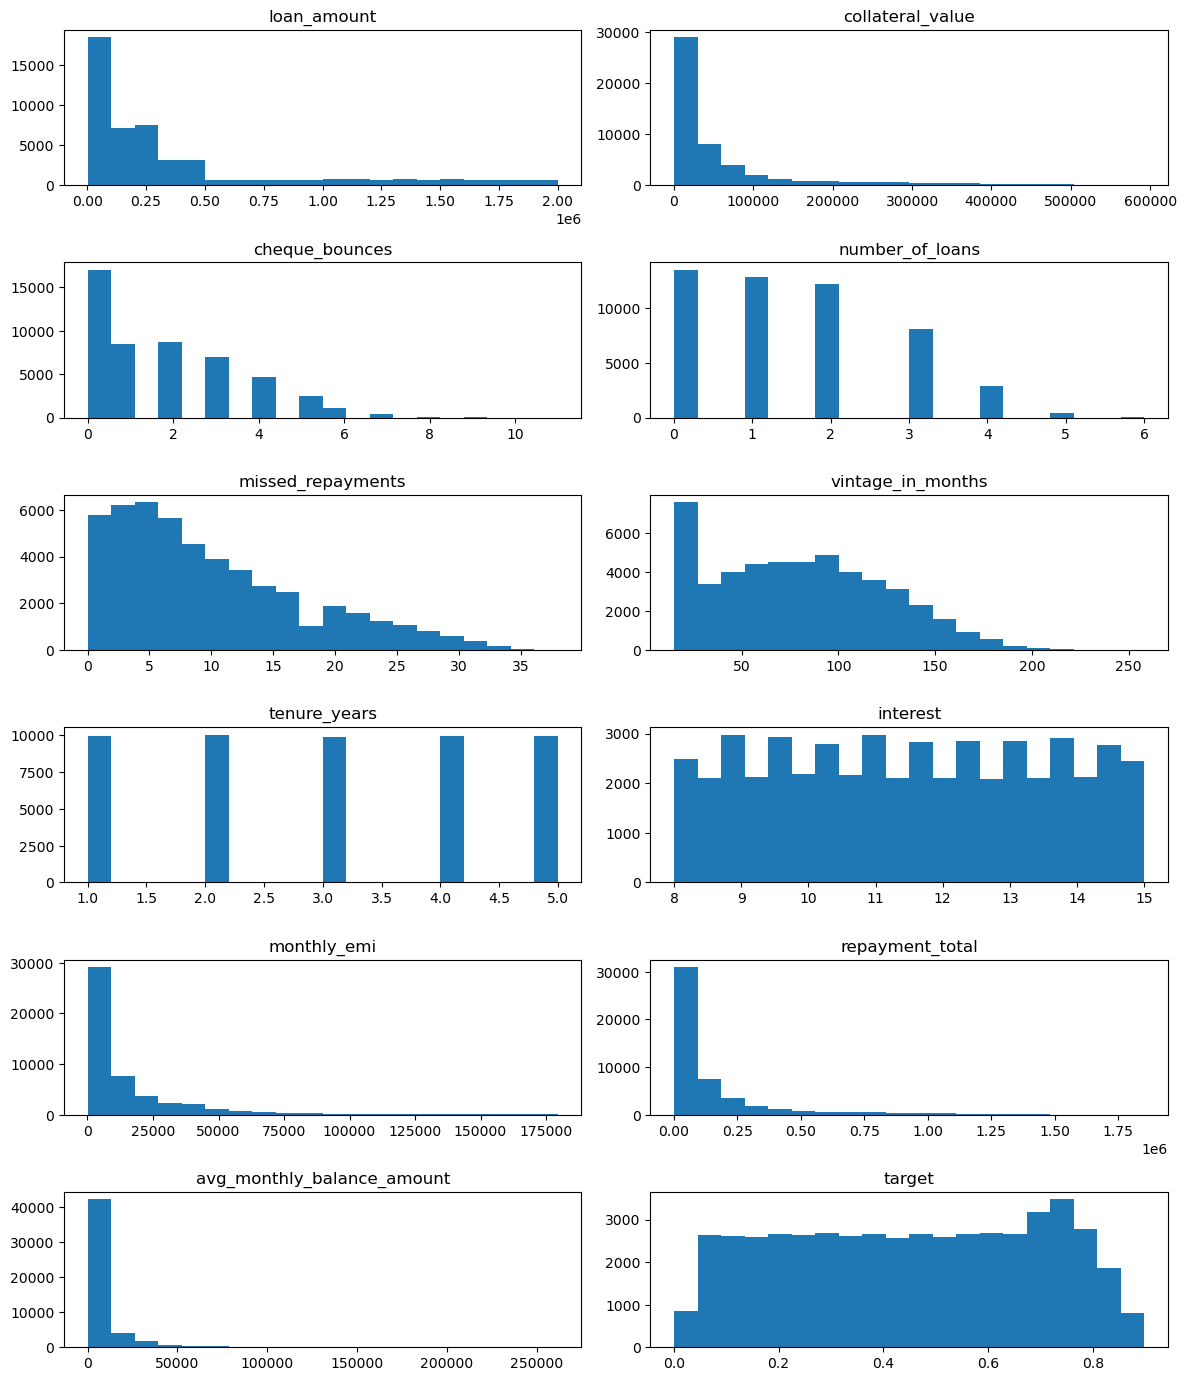

In [63]:
# Check the data distribution of numerical columns
num_col = data.select_dtypes(include='number').columns.tolist()
plt.figure(figsize=(12, 16)) 

for i, column in enumerate(num_col):
    plt.subplot(7, 2, i+1)
    plt.hist(data[column], bins = 20)
    plt.title(column)

plt.tight_layout()
plt.show()

#### Insights : Loan amount, collateral, monthly_emi, repayment have outliers. The majority of the data is concentrated on the left side, it is an asymmetrical distribution. Mean would be a better representation of the central tendency here.

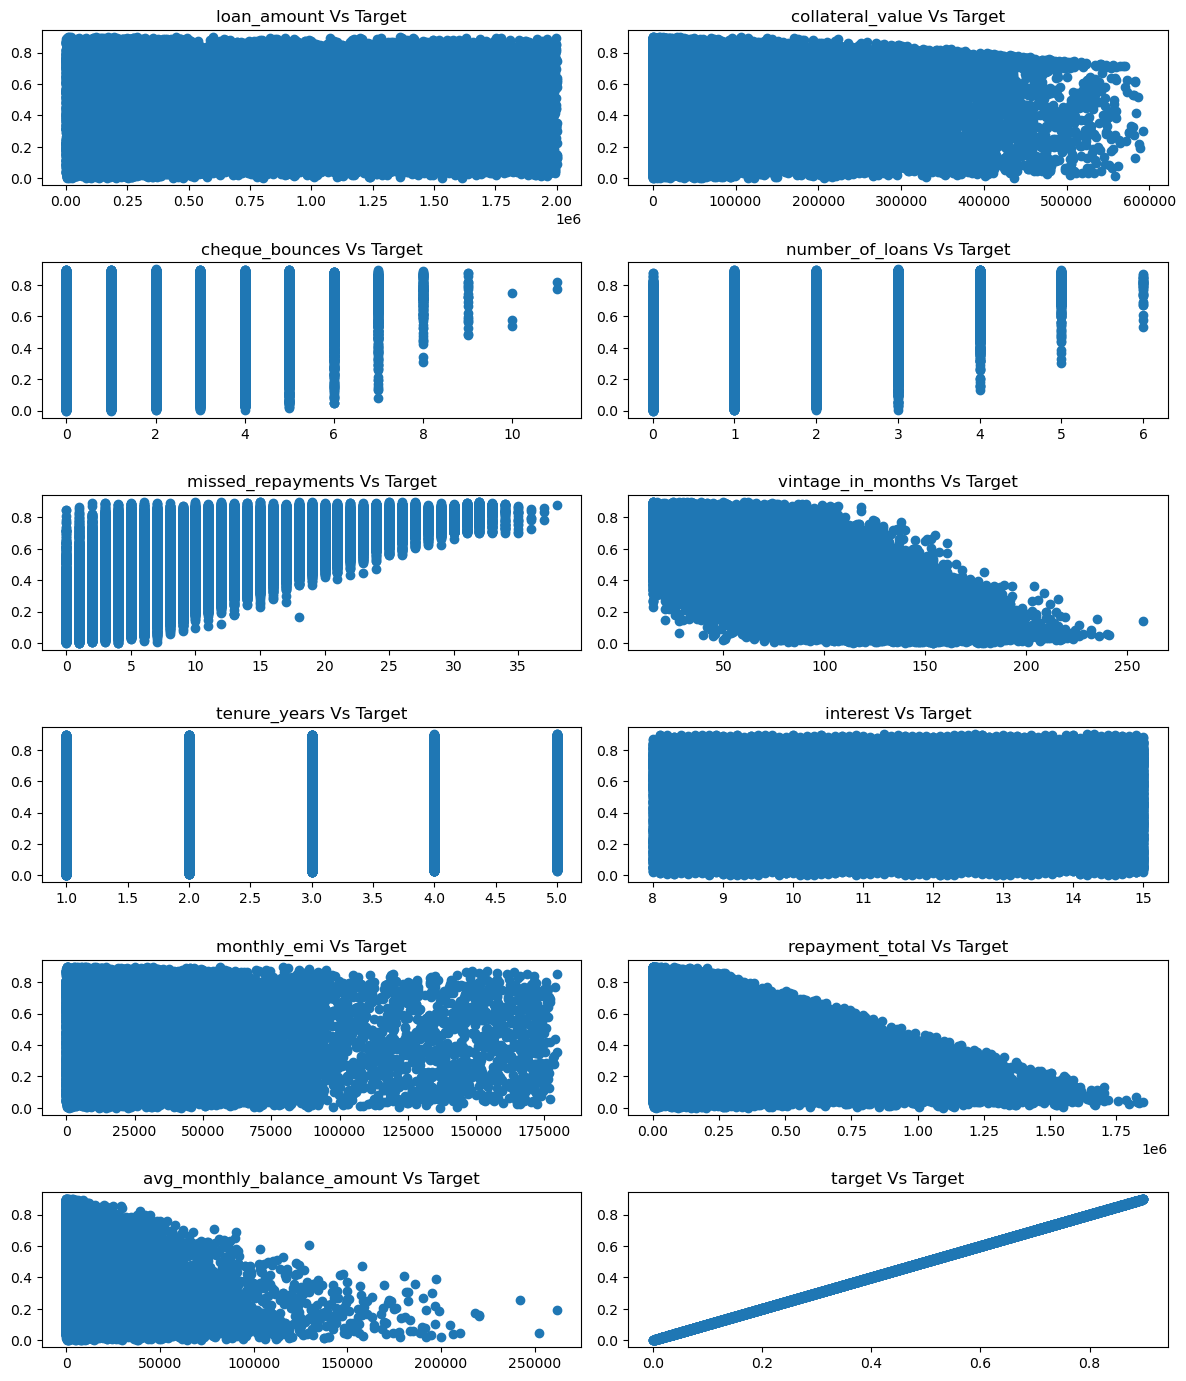

In [64]:
# Check the relationshiop between dependent and indedendent variables thought scatter plot.

num_col = data.select_dtypes(include='number').columns.tolist()
plt.figure(figsize=(12, 16)) 

for i, column in enumerate(num_col):
    plt.subplot(7, 2, i+1)
    plt.scatter(data[column], data['target'])
    plt.title(column + ' Vs Target')

plt.tight_layout()
plt.show()

#### Observation : Avg monthly balance, repayment total, vintage in months have negative correlation with target.
#### Customers with higher monthly balance to have lower chances of defaulting the loan.
#### Customers with lower repayment total that means with higher due amount are likely to have higher chances of defaulting hence higher LGD.
#### The longer a customer is associated with the bank, the lesser chances of defaulting hence lesser LGD.
#### The risk of LGD is same till the no of loans are 3. The risk of LGD increases when the no of loans are higher than 3.
#### The higher the missed repayments, the higher chances of LGD.

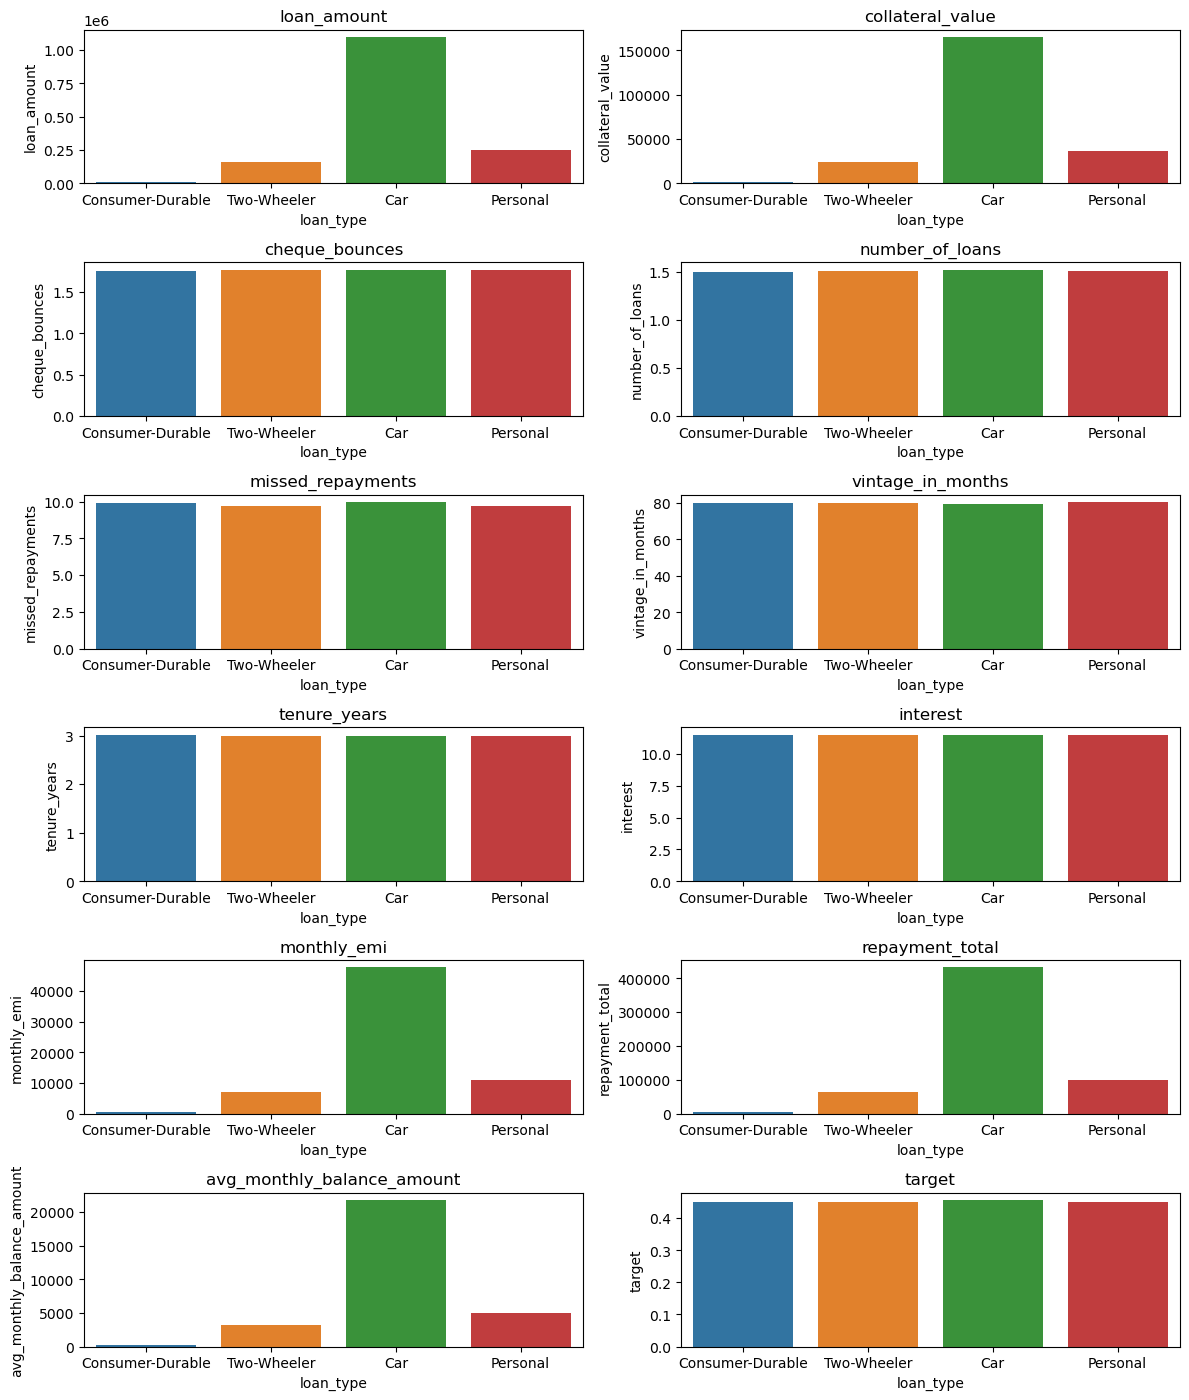

In [66]:
# Check the numerical data distribution for various loan types

col = data.select_dtypes(include='number').columns.tolist()
plt.figure(figsize=(12, 16)) 

for i, column in enumerate(col):
    plt.subplot(7, 2, i+1)
    sns.barplot(x = 'loan_type', y = column, data = data, ci = None)
    plt.title(column)

plt.tight_layout()
plt.show()

### Insights : The maximum loan amount was given for 'Car' category. The amounts for repayment, monthly balance, collateral have similar trend as loan amount.

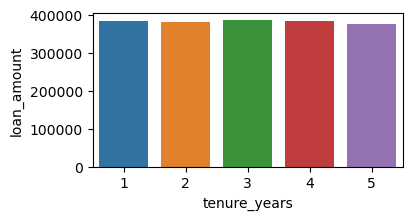

In [67]:
plt.figure(figsize=(4, 2)) 
sns.barplot(x = 'tenure_years', y = 'loan_amount', data = data, ci = None)
plt.show()

### Insights : The loan amount doesn't vary significantly across different tenures.

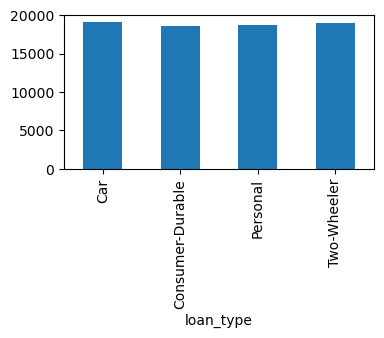

In [68]:
plt.figure(figsize=(4, 2)) 
data.groupby('loan_type')['number_of_loans'].sum().plot(kind = 'bar')
plt.show()

### Insights : The number of loans across all the categories is similar.

<Figure size 1200x1600 with 0 Axes>

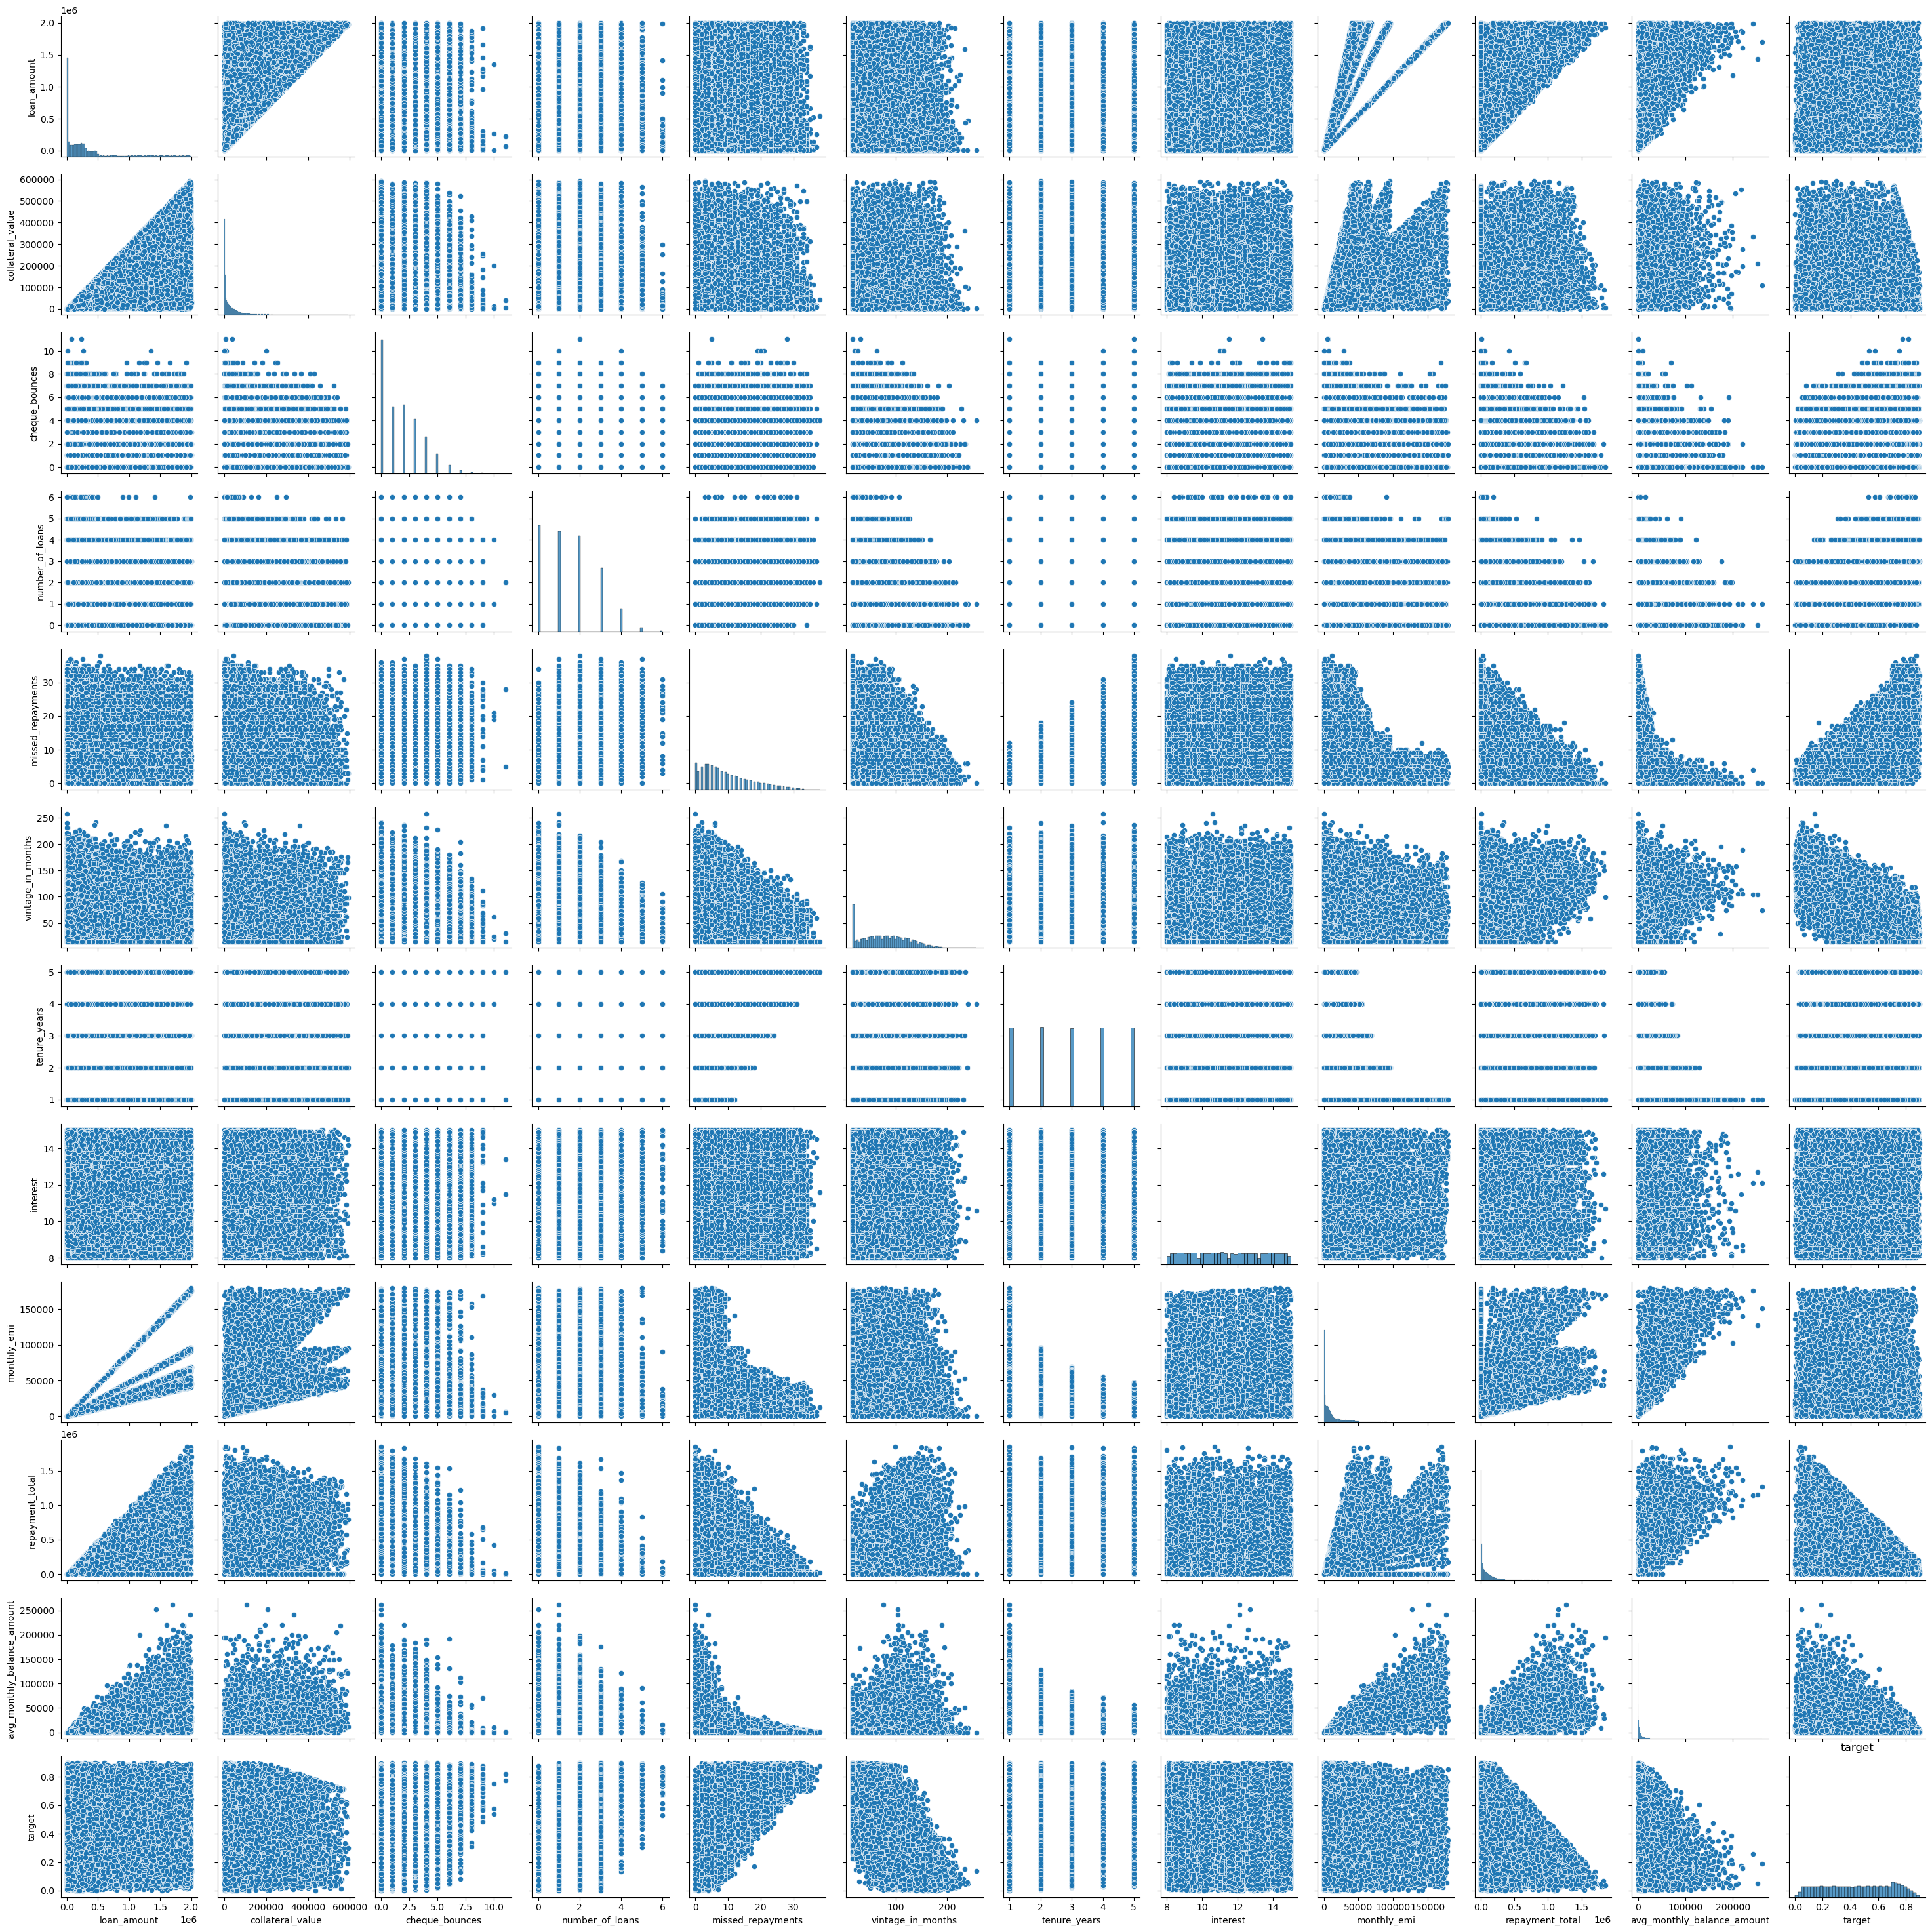

In [69]:
# Check the relationship between the variables

col = data.select_dtypes(include='number').columns.tolist()
plt.figure(figsize=(12, 16)) 
sns.pairplot(data[col])
plt.title(column)
plt.show()

### Insights : There is correlation between few independent variables.

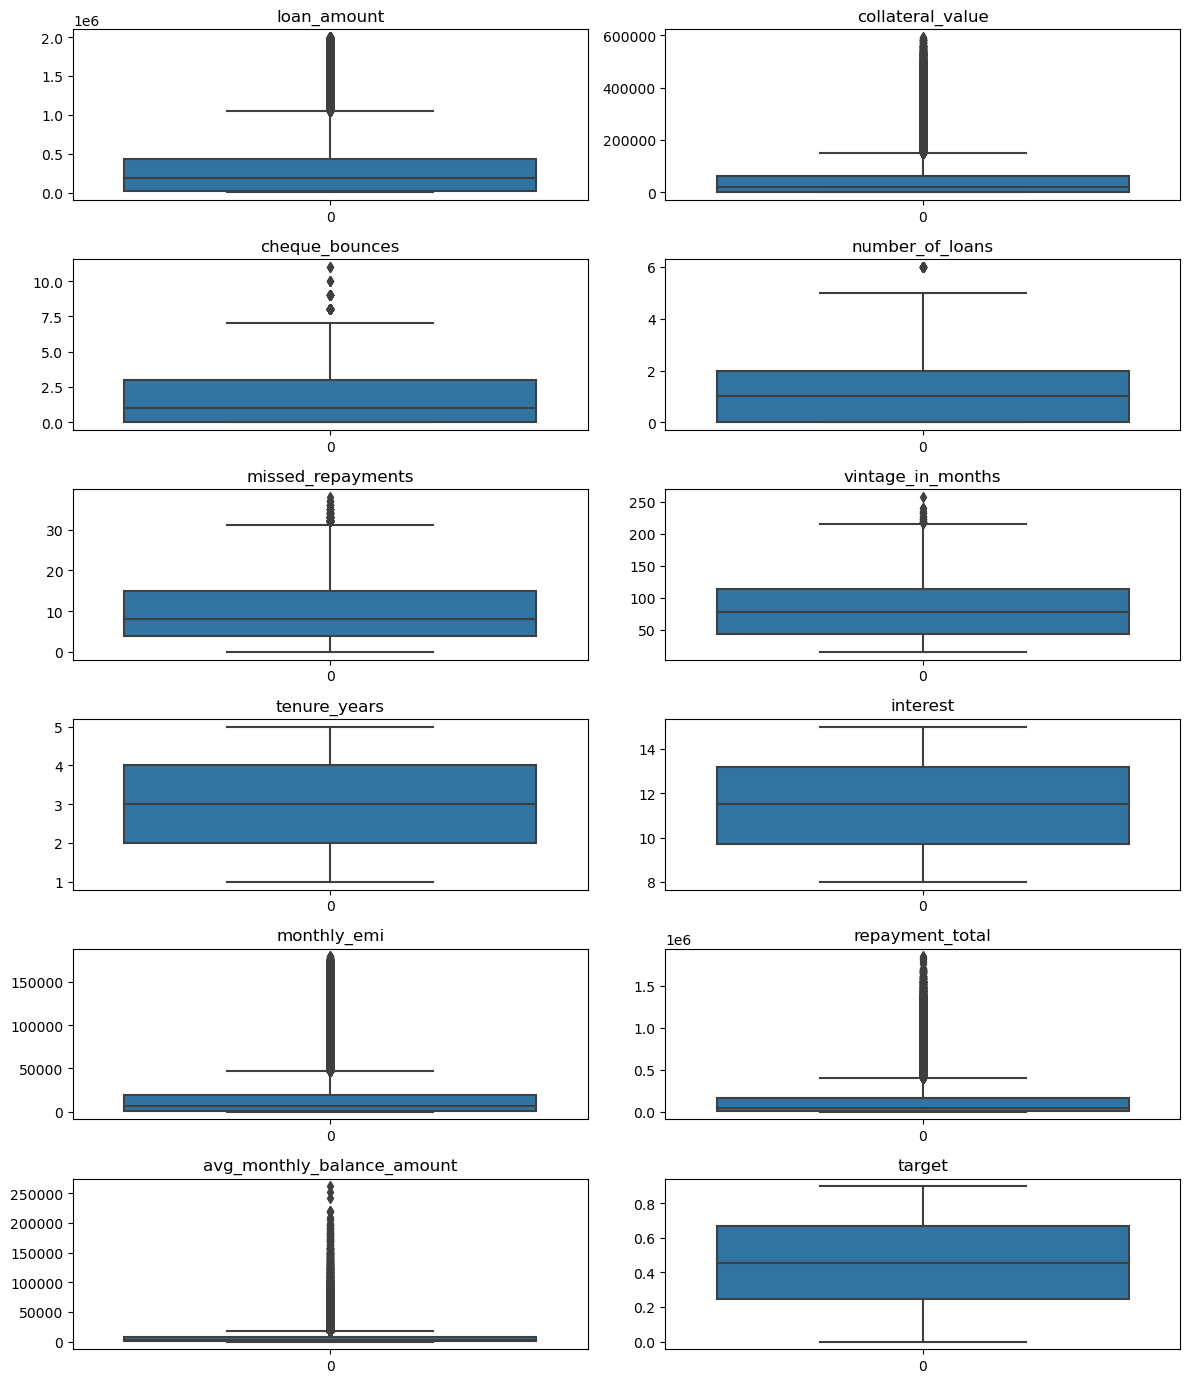

In [70]:
# Check the numerical data for outliers
col = data.select_dtypes(include='number').columns.tolist()

plt.figure(figsize=(12, 16)) 

for i, column in enumerate(col):
    plt.subplot(7, 2, i+1)
    sns.boxplot(data=data[column])
    plt.title(column)

plt.tight_layout()
plt.show()

### Outliers treatment : The outliers to be replaced with mean value for the below columns.
  [ 'loan_amount', 'collateral_value', 'monthly_emi', 'repayment_total', 'avg_monthly_balance_amount']

In [71]:
# Outliers to be replaced with mean value

outlier_lst = ['loan_amount', 'collateral_value', 'monthly_emi', 'repayment_total', 'avg_monthly_balance_amount']

for col in outlier_lst:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1


    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = (data[col] < lower_bound) | (data[col] > upper_bound)
    
    mean_value = data[col].mean()
    data.loc[outliers, col] = mean_value

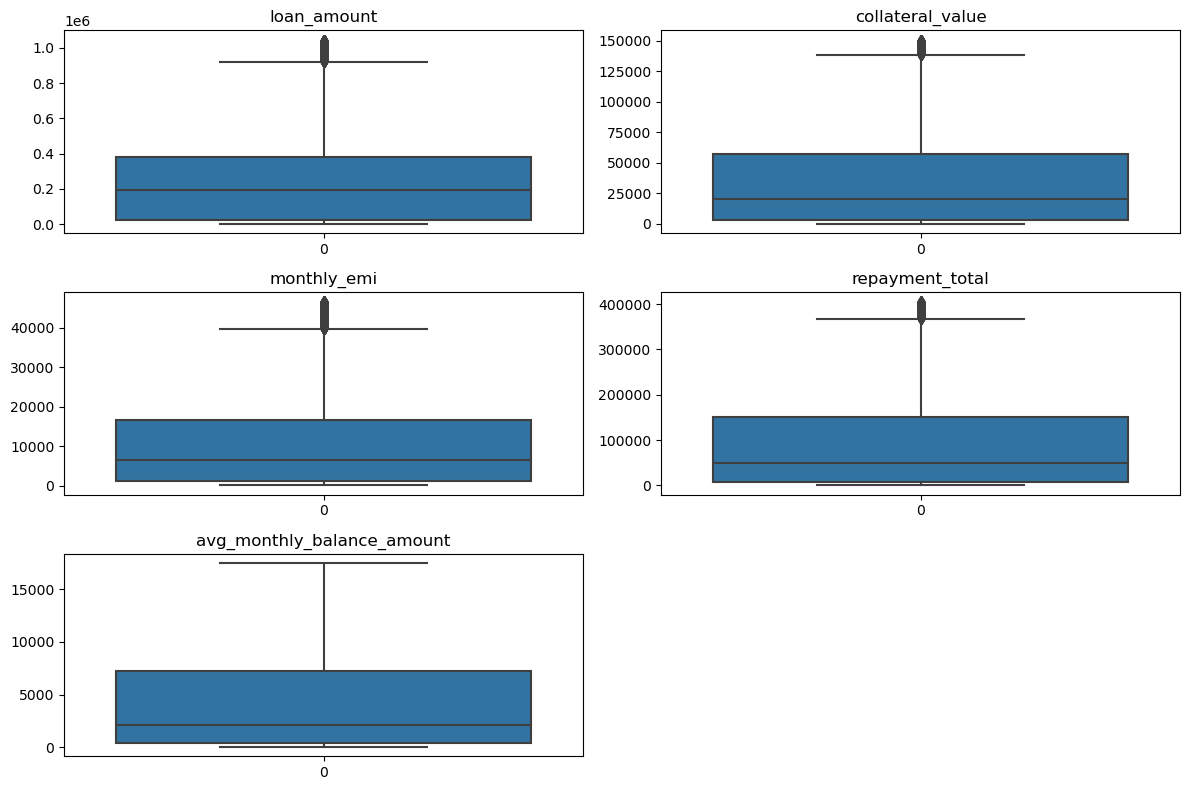

In [72]:
# Graphical representation of variables after outlier treatment

outlier_lst = ['loan_amount', 'collateral_value', 'monthly_emi', 'repayment_total', 'avg_monthly_balance_amount']
plt.figure(figsize=(12, 8)) 

for i, column in enumerate(outlier_lst):
    plt.subplot(3, 2, i+1)
    sns.boxplot(data=data[column])
    plt.title(column)

plt.tight_layout()
plt.show()

<Axes: >

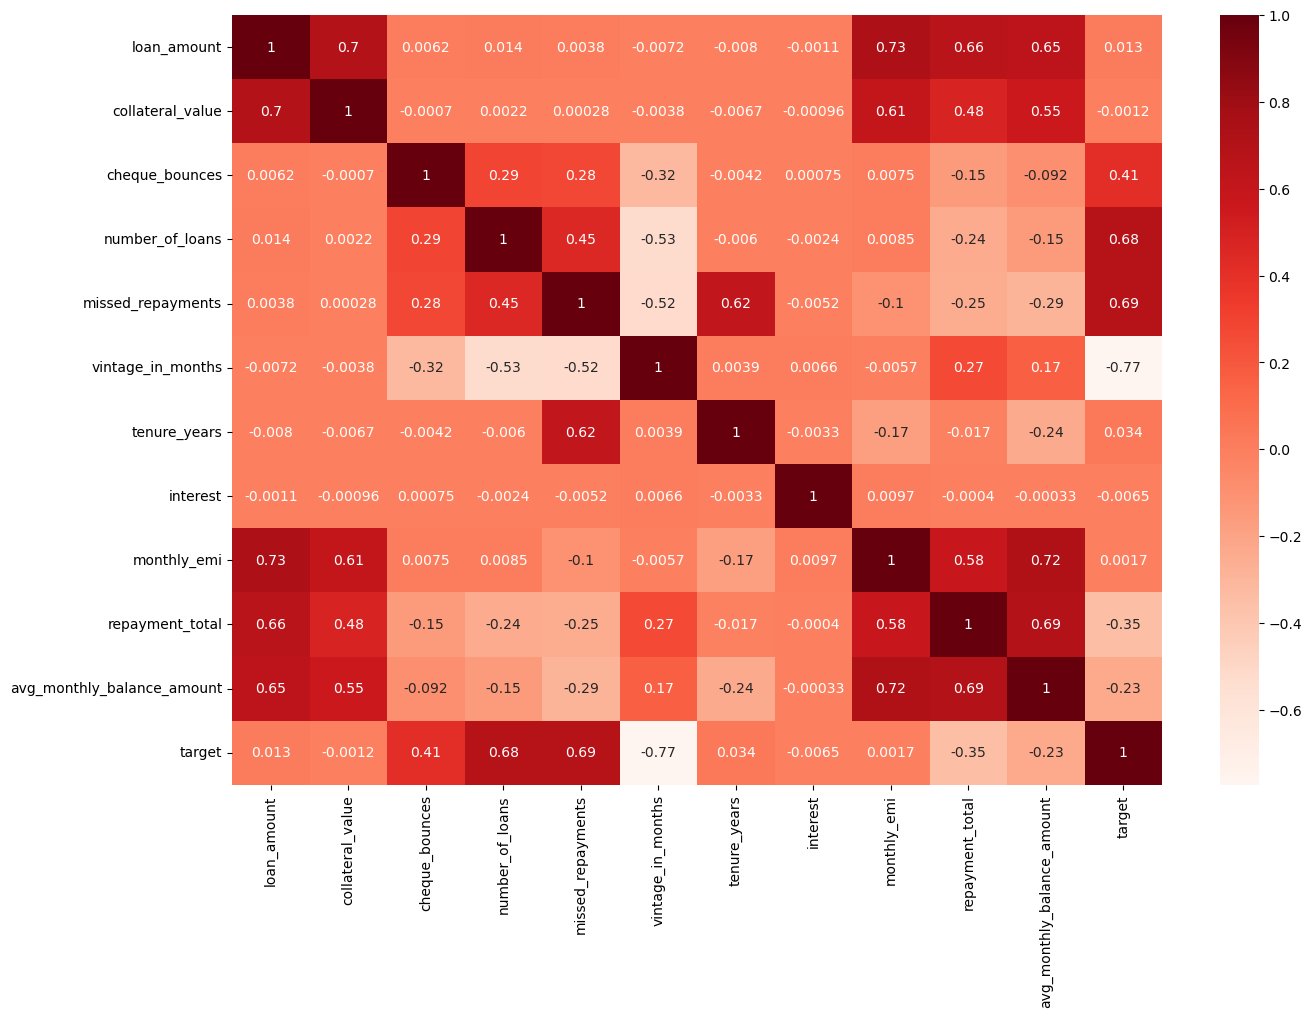

In [73]:
plt.figure(figsize = (15,10))
sns.heatmap(data.corr(), cmap="Reds", annot=True)

#### Insights : The Target variable ( LGD ) has a high positive correlation with "Number of Loans", "Missed Repayments" and a high negative correlation with "Vintage in Months“.
#### The customers associated with the bank for a long period of time tend to have a lower probability of default and hence the proportion of LGD decreases due to them paying back their loan on time.
#### People who have a longer loan tenure tend to have more missed repayments.

### Step 3 : Preparing the data for modeling (encoding, rescaling, train-test split etc)

In [74]:
# Drop the irrelevant columns
data1 = data.drop(['disbursal_date', 'default_date','loan_acc_num', 'customer_name', 'customer_address'],axis=1)

In [75]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49889 entries, 0 to 49984
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_type                   49889 non-null  object 
 1   loan_amount                 49889 non-null  float64
 2   collateral_value            49889 non-null  float64
 3   cheque_bounces              49889 non-null  int64  
 4   number_of_loans             49889 non-null  int64  
 5   missed_repayments           49889 non-null  int64  
 6   vintage_in_months           49889 non-null  int64  
 7   tenure_years                49889 non-null  int64  
 8   interest                    49889 non-null  float64
 9   monthly_emi                 49889 non-null  float64
 10  repayment_total             49889 non-null  float64
 11  avg_monthly_balance_amount  49889 non-null  float64
 12  target                      49889 non-null  float64
dtypes: float64(7), int64(5), object

In [76]:
# Independent and dependent variable split
X = data1.drop('target', axis=1)
y = data1['target']

In [77]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [78]:
# create a list with numerical variables
numerical_columns = X_train.select_dtypes(include='number').columns.tolist()
numerical_columns

['loan_amount',
 'collateral_value',
 'cheque_bounces',
 'number_of_loans',
 'missed_repayments',
 'vintage_in_months',
 'tenure_years',
 'interest',
 'monthly_emi',
 'repayment_total',
 'avg_monthly_balance_amount']

In [79]:
# Use standard scaling process
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_train.head()

loan_type  loan_amount  collateral_value  cheque_bounces  \
34388  Consumer-Durable    -0.948041         -0.904231       -1.004019   
7472                Car     0.843726          0.188635       -0.438214   
44563       Two-Wheeler    -0.335877         -0.219502        0.693395   
8622           Personal     0.165089          0.607567       -1.004019   
24154       Two-Wheeler     0.104252         -0.327326       -0.438214   

       number_of_loans  missed_repayments  vintage_in_months  tenure_years  \
34388        -0.408610          -0.104055          -0.996911      0.005601   
7472          0.381767          -0.875179          -0.701224      1.417826   
44563         1.172144           2.080797          -1.474561      1.417826   
8622         -1.198986          -0.875179           0.754469      0.005601   
24154        -0.408610          -0.618137           0.458781      0.005601   

       interest  monthly_emi  repayment_total  avg_monthly_balance_amount  
34388  0.702843    -0.863786        -0.787747                   -0.838637  
7472   1.150280    -0.064907         2.176187                   -0.686391  
44563 -0.341176    -0.626985        -0.694849                   -0.933475  
8622  -0.838328    -0.158551         0.927793                    1.056624  
24154  0.404552    -0.170123         1.257339                    0.055376

In [80]:
# Create the numerical values for categorical column loan type
loan_encoded = pd.get_dummies(X_train['loan_type'],drop_first=True)

In [81]:
# the loan_type column is not required now as we will use the encoded columns
X_train = X_train.drop('loan_type', axis=1)

In [82]:
# Add the encoded columns in training dataframe
X_train = pd.concat([X_train, loan_encoded], axis=1)

In [83]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34922 entries, 34388 to 15834
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amount                 34922 non-null  float64
 1   collateral_value            34922 non-null  float64
 2   cheque_bounces              34922 non-null  float64
 3   number_of_loans             34922 non-null  float64
 4   missed_repayments           34922 non-null  float64
 5   vintage_in_months           34922 non-null  float64
 6   tenure_years                34922 non-null  float64
 7   interest                    34922 non-null  float64
 8   monthly_emi                 34922 non-null  float64
 9   repayment_total             34922 non-null  float64
 10  avg_monthly_balance_amount  34922 non-null  float64
 11  Consumer-Durable            34922 non-null  uint8  
 12  Personal                    34922 non-null  uint8  
 13  Two-Wheeler                

In [136]:
numerical_columns = X_test.select_dtypes(include='number').columns.tolist()
numerical_columns

['loan_amount',
 'collateral_value',
 'cheque_bounces',
 'number_of_loans',
 'missed_repayments',
 'vintage_in_months',
 'tenure_years',
 'interest',
 'monthly_emi',
 'repayment_total',
 'avg_monthly_balance_amount']

In [137]:
X_test[numerical_columns] = scaler.fit_transform(X_test[numerical_columns])
X_test.head()

loan_type  loan_amount  collateral_value  cheque_bounces  \
24787  Consumer-Durable    -0.944187         -0.740653        1.290428   
26571          Personal     0.715605          0.138433        0.144308   
200         Two-Wheeler     0.187473          0.875967       -1.001811   
48075               Car     0.695607          1.315348       -1.001811   
1167                Car     1.779317          1.916861       -1.001811   

       number_of_loans  missed_repayments  vintage_in_months  tenure_years  \
24787         2.008935           0.274999          -0.700418     -0.718076   
26571        -0.401819          -1.008136           1.394442     -0.718076   
200           0.401766           0.018372          -0.452639     -0.718076   
48075        -0.401819          -0.879823           0.515952     -1.427666   
1167         -0.401819          -0.366568           0.245648     -0.008486   

       interest  monthly_emi  repayment_total  avg_monthly_balance_amount  
24787 -1.020776    -0.834942        -0.912044                   -0.902267  
26571 -0.677266     0.685876         2.601740                    2.868000  
200    0.156973     0.221620         0.035961                   -0.930378  
48075  1.678232     0.569876         0.743150                    0.953403  
1167  -1.217067     0.851437         0.808273                    0.054312

In [138]:
# Create the numerical values for categorical column loan type
loan_encoded = pd.get_dummies(X_test['loan_type'],drop_first=True)

In [139]:
# the loan_type column is not required now as we will use the encoded columns
X_test = X_test.drop('loan_type', axis=1)

In [140]:
# Add the encoded columns in training dataframe
X_test = pd.concat([X_test, loan_encoded], axis=1)

In [141]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14967 entries, 24787 to 10420
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amount                 14967 non-null  float64
 1   collateral_value            14967 non-null  float64
 2   cheque_bounces              14967 non-null  float64
 3   number_of_loans             14967 non-null  float64
 4   missed_repayments           14967 non-null  float64
 5   vintage_in_months           14967 non-null  float64
 6   tenure_years                14967 non-null  float64
 7   interest                    14967 non-null  float64
 8   monthly_emi                 14967 non-null  float64
 9   repayment_total             14967 non-null  float64
 10  avg_monthly_balance_amount  14967 non-null  float64
 11  Consumer-Durable            14967 non-null  uint8  
 12  Personal                    14967 non-null  uint8  
 13  Two-Wheeler                

### Feature scaling for the unseen dataset : Categorical variable encoding and numerical variable scaling for test dataset

In [113]:
#Drop the irrelevant columns from train and test data sets

test_data = test_data.drop(['disbursal_date', 'default_date','loan_acc_num', 'customer_name', 'customer_address'],axis=1)

In [114]:
#Testing dataframe with independent and dependent variable
X_test_new = test_data.drop('target', axis=1)
y_test_new = test_data['target']

In [115]:
# create a list with numerical variables : Test data
numerical_columns = X_test_new.select_dtypes(include='number').columns.tolist()
numerical_columns

['loan_amount',
 'collateral_value',
 'cheque_bounces',
 'number_of_loans',
 'missed_repayments',
 'vintage_in_months',
 'tenure_years',
 'interest',
 'monthly_emi',
 'repayment_total',
 'avg_monthly_balance_amount']

In [116]:
# Use standard scaling process
from sklearn.preprocessing import StandardScaler

X_test_new[numerical_columns] = scaler.transform(X_test_new[numerical_columns])
X_test_new.head()

loan_type  loan_amount  collateral_value  cheque_bounces  \
0               Car     4.733140         -0.645626        0.693395   
1  Consumer-Durable    -0.954485         -0.884117       -1.004019   
2               Car    -0.099827         -0.702451       -0.438214   
3       Two-Wheeler    -0.164788         -0.153301        1.259200   
4  Consumer-Durable    -1.026888         -0.904465       -0.438214   

   number_of_loans  missed_repayments  vintage_in_months  tenure_years  \
0        -0.408610          -0.618137           0.527017     -1.406624   
1         1.172144           2.080797          -0.928676      1.417826   
2         0.381767          -1.260741          -0.382791     -1.406624   
3         1.172144           0.281507          -1.474561     -0.700512   
4        -0.408610          -1.260741           1.641532     -1.406624   

   interest  monthly_emi  repayment_total  avg_monthly_balance_amount  
0  0.305122     9.241212         6.535859                    5.672762  
1  0.354837    -0.890401        -0.888915                   -0.913401  
2  1.199995     0.759706         0.319102                    2.922046  
3  0.503982    -0.102188        -0.711445                   -0.235379  
4  1.548002    -0.885579        -0.875469                   -0.766080

In [117]:
# Create the numerical values for categorical column loan type
test_loan_encoded = pd.get_dummies(X_test_new['loan_type'],drop_first=True)

In [118]:
# the loan_type column is not required now as we will use the encoded columns
X_test_new = X_test_new.drop('loan_type', axis=1)

In [120]:
# Add the encoded columns in training dataframe
X_test_new = pd.concat([X_test_new, test_loan_encoded], axis=1)

In [121]:
X_test_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9975 entries, 0 to 9996
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amount                 9975 non-null   float64
 1   collateral_value            9975 non-null   float64
 2   cheque_bounces              9975 non-null   float64
 3   number_of_loans             9975 non-null   float64
 4   missed_repayments           9975 non-null   float64
 5   vintage_in_months           9975 non-null   float64
 6   tenure_years                9975 non-null   float64
 7   interest                    9975 non-null   float64
 8   monthly_emi                 9975 non-null   float64
 9   repayment_total             9975 non-null   float64
 10  avg_monthly_balance_amount  9975 non-null   float64
 11  Consumer-Durable            9975 non-null   uint8  
 12  Personal                    9975 non-null   uint8  
 13  Two-Wheeler                 9975 

### Step 4 : Model Building & Evaluation
### Multiple Linear regression : Model training & evaluation

In [122]:
from sklearn.linear_model import LinearRegression

In [123]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [124]:
# Running the linear model
import statsmodels
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
lm = sm.OLS(y_train,X_train_sm).fit()  
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                 1.285e+04
Date:                Sun, 25 Feb 2024   Prob (F-statistic):               0.00
Time:                        18:09:22   Log-Likelihood:                 31931.
No. Observations:               34922   AIC:                        -6.383e+04
Df Residuals:                   34907   BIC:                        -6.370e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [125]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
4            missed_repayments  3.53
0                  loan_amount  3.42
10  avg_monthly_balance_amount  3.05
8                  monthly_emi  2.96
9              repayment_total  2.70
6                 tenure_years  2.49
1             collateral_value  2.12
5            vintage_in_months  1.92
3              number_of_loans  1.64
11            Consumer-Durable  1.43
2               cheque_bounces  1.17
13                 Two-Wheeler  1.04
12                    Personal  1.02
7                     interest  1.00

### Multiple Linear regression : Residual analysis

In [126]:
y_train_pred = lm.predict(X_train_sm)

Text(0.5, 0, 'Errors')

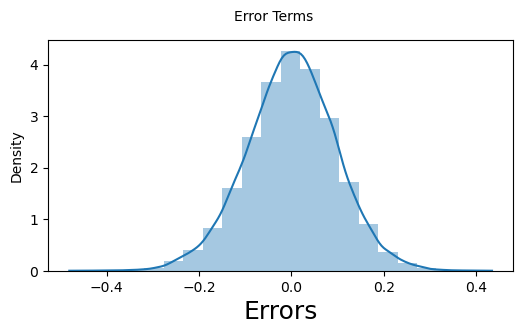

In [127]:
fig = plt.figure(figsize=(6,3))
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 10)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

#### The mean square errors are binomially distriputed

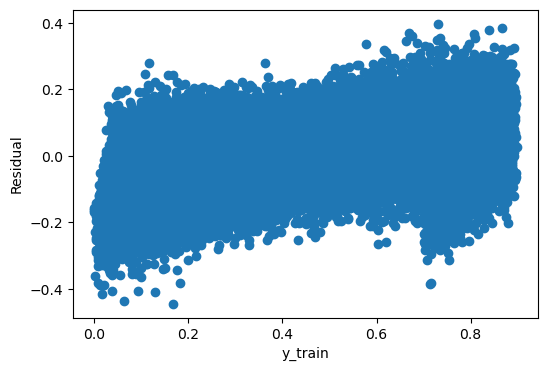

In [128]:
fig = plt.figure(figsize=(6,4))
residuals=(y_train-y_train_pred)
plt.scatter(y_train,residuals)
plt.xlabel("y_train")
plt.ylabel("Residual")
plt.show()

### Prediction and evaluation on the test set

In [142]:
X_test_sm = sm.add_constant(X_test)
y_pred = lm.predict(X_test_sm)

In [143]:
# Check the  R score for train & test data

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print('Train mean_squared_error: ' ,mean_squared_error(y_train,y_train_pred))
print('Test mean_squared_error: ' ,mean_squared_error(y_test, y_pred))

print('Train R-Score: ' ,r2_score(y_train,y_train_pred))
print('Test R-Score: ' ,r2_score(y_test, y_pred))

Train mean_squared_error:  0.009404509796849916
Test mean_squared_error:  0.009133246603009524
Train R-Score:  0.8374613948484185
Test R-Score:  0.8406901704749016


### Multiple Linear regression : Prediction on the unseen data set

In [144]:
X_test_new_sm = sm.add_constant(X_test_new)
y_pred_new = lm.predict(X_test_new_sm)

Text(0, 0.5, 'y_pred_new')

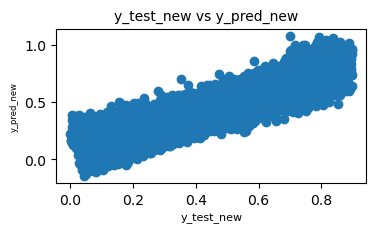

In [145]:
## Model evaluation

fig = plt.figure(figsize=(4,2))
plt.scatter(y_test,y_pred)
fig.suptitle('y_test_new vs y_pred_new', fontsize=10)              # Plot heading 
plt.xlabel('y_test_new', fontsize=8)                          # X-label
plt.ylabel('y_pred_new', fontsize=6)                          # Y-label

In [190]:
# Check the  R score for train & test data

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print('Predicted mean_squared_error: ' ,mean_squared_error(y_test_new, y_pred_new))
print('Predicted R-Score: ' ,r2_score(y_test_new, y_pred_new))

Predicted mean_squared_error:  0.00537885154863304
Predicted R-Score:  0.9056771884076825


### Interest variable p-value is more than 0.05 which means it is not statistically significant. We will use Recurssive Feature Elimimation to select important features.

### Multiple Linear regression using RFE : Model training & evaluation

In [146]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [147]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step = 10)           
rfe = rfe.fit(X_train, y_train)

In [148]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('loan_amount', False, 2),
 ('collateral_value', False, 2),
 ('cheque_bounces', True, 1),
 ('number_of_loans', True, 1),
 ('missed_repayments', True, 1),
 ('vintage_in_months', True, 1),
 ('tenure_years', True, 1),
 ('interest', False, 2),
 ('monthly_emi', False, 2),
 ('repayment_total', True, 1),
 ('avg_monthly_balance_amount', False, 2),
 ('Consumer-Durable', True, 1),
 ('Personal', False, 2),
 ('Two-Wheeler', False, 2)]

In [149]:
col = X_train.columns[rfe.support_]
col

Index(['cheque_bounces', 'number_of_loans', 'missed_repayments',
       'vintage_in_months', 'tenure_years', 'repayment_total',
       'Consumer-Durable'],
      dtype='object')

In [150]:
# Running the linear model
import statsmodels
import statsmodels.api as sm

X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()  
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                 2.491e+04
Date:                Sun, 25 Feb 2024   Prob (F-statistic):               0.00
Time:                        18:54:04   Log-Likelihood:                 31474.
No. Observations:               34922   AIC:                        -6.293e+04
Df Residuals:                   34914   BIC:                        -6.286e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.4581      0.00

In [151]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
3  missed_repayments  3.47
5       tenure_years  2.33
4  vintage_in_months  1.91
2    number_of_loans  1.63
6    repayment_total  1.53
0              const  1.45
7   Consumer-Durable  1.37
1     cheque_bounces  1.17

### Observation : All the variables in the model are statistically significant because the p-values for all is less than 0.05. The VIF score is less than 5 for all of the selected variables which means there is no multicollinearity.

#### Multiple Linear regression using RFE : Residual analysis

In [152]:
y_train_pred = lm.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

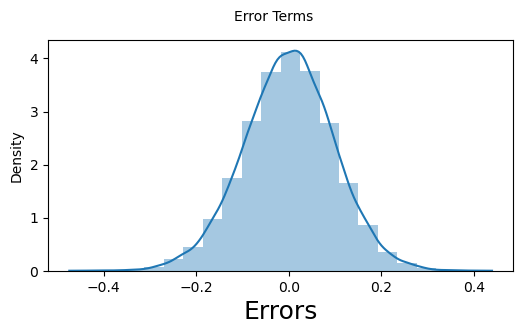

In [153]:
fig = plt.figure(figsize=(6,3))
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 10)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

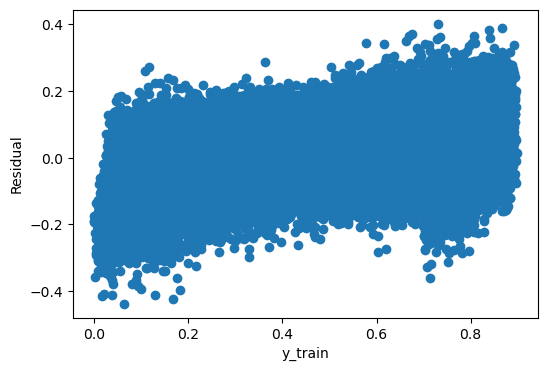

In [154]:
fig = plt.figure(figsize=(6,4))
residuals=(y_train-y_train_pred)
plt.scatter(y_train,residuals)
plt.xlabel("y_train")
plt.ylabel("Residual")
plt.show()

### Observation : The residuals are evenly distributed at y=0 and do not follow any specific pattern. This ensures the models accuracy.

#### Multiple Linear regression using RFE : Prediction and evaluation on the test set

In [155]:
# Use the final selected variables in test data set
X_test_rfe = X_test[col]
X_test_rfe.shape

(14967, 7)

In [156]:
X_test_sm = sm.add_constant(X_test_rfe)
y_pred = lm.predict(X_test_sm)

Text(0, 0.5, 'y_pred')

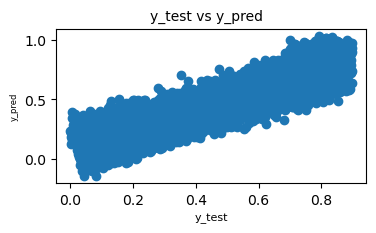

In [157]:
## Model evaluation

fig = plt.figure(figsize=(4,2))
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=10)              # Plot heading 
plt.xlabel('y_test', fontsize=8)                          # X-label
plt.ylabel('y_pred', fontsize=6)                          # Y-label

### Insights : The graph shows a strong linear relationship between the predicted and actual values. This suggests that the model's predictions are close to the true values. The points are tightly packed, it indicates that the model's predictions have low variance.

In [158]:
# Check the  R score for train & test data

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print('Train mean_squared_error: ' ,mean_squared_error(y_train,y_train_pred))
print('Test mean_squared_error: ' ,mean_squared_error(y_test, y_pred))

print('Train R-Score: ' ,r2_score(y_train,y_train_pred))
print('Test R-Score: ' ,r2_score(y_test, y_pred))

Train mean_squared_error:  0.009653750241858135
Test mean_squared_error:  0.009323769115807557
Train R-Score:  0.8331537599844977
Test R-Score:  0.8373669153002798


#### Insights : The regression model explains a significant portion of the variance in the target variable.

### Multiple Linear regression using RFE : Prediction on the unseen data set

In [159]:
# Use the final selected variables from the Linear regression training model
X_test_new_lr = X_test_new[col]
X_test_new_lr.shape

(9975, 7)

In [160]:
X_test_new_sm = sm.add_constant(X_test_new_lr)
y_pred_new = lm.predict(X_test_new_sm)

Text(0, 0.5, 'y_pred_new')

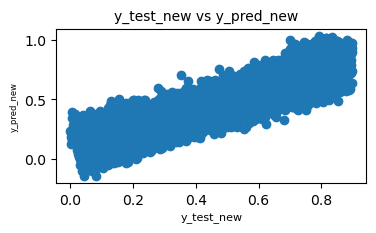

In [161]:
## Model evaluation

fig = plt.figure(figsize=(4,2))
plt.scatter(y_test,y_pred)
fig.suptitle('y_test_new vs y_pred_new', fontsize=10)              # Plot heading 
plt.xlabel('y_test_new', fontsize=8)                          # X-label
plt.ylabel('y_pred_new', fontsize=6)                          # Y-label

In [162]:
# Check the  R score for train & test data

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print('Summary : Multiple Linear regression using RFE')
print('Predicted mean_squared_error: ' ,mean_squared_error(y_test_new, y_pred_new))
print('Predicted Test R-Score: ' ,r2_score(y_test_new, y_pred_new))

Summary : Multiple Linear regression using RFE
Predicted mean_squared_error:  0.01127649710471842
Predicted Test R-Score:  0.8022568754291098


### Gradient boosting : Model training & evaluation

In [164]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# GradientBoostingRegressor instance
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model on the training data
gb_regressor.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred = gb_regressor.predict(X_train)

# Make predictions on the test data
y_pred = gb_regressor.predict(X_test)

# Evaluate the model using mean squared error
print('Train mean_squared_error: ' ,mean_squared_error(y_train,y_train_pred))
print('Test mean_squared_error: ' ,mean_squared_error(y_test, y_pred))
print('Train R-Score: ' ,r2_score(y_train,y_train_pred))
print('Test R-Score: ' ,r2_score(y_test, y_pred))

Train mean_squared_error:  0.005496786584044251
Test mean_squared_error:  0.005948287413454711
Train R-Score:  0.9049987672418884
Test R-Score:  0.8962449285567845


### Gradient boosting : Prediction on the unseen data set

In [165]:
# To Make predictions on the test data
y_pred_new = gb_regressor.predict(X_test_new)

In [166]:
# Model evaluation on unseen data
print('Summary : Gradient boosting')
print('Predicted mean_squared_error: ' ,mean_squared_error(y_test_new, y_pred_new))
print('Predicted R-Score: ' ,r2_score(y_test_new, y_pred_new))

Summary : Gradient boosting
Predicted mean_squared_error:  0.005667977043659711
Predicted R-Score:  0.9006071229211445


### Gradient boosting : Hyperparameter tuning

In [167]:
from sklearn.model_selection import GridSearchCV
# To Create a Gradient Boosting Regressor model
gb_regressor = GradientBoostingRegressor()

# Define the hyperparameters and their potential values for tuning. The final tuned parameters are: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}
param_grid = {
    'learning_rate': [0.1],
    'n_estimators': [300],
    'max_depth': [7]
}

# To Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=gb_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
gb_best_params = grid_search.best_params_
gb_best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = gb_best_model.predict(X_test)

# Model Evaluation
print('Test mean_squared_error: ' ,mean_squared_error(y_test, y_pred))
print('Test R-Score: ' ,r2_score(y_test, y_pred))

Test mean_squared_error:  0.004215612757829615
Test R-Score:  0.9264677086927261


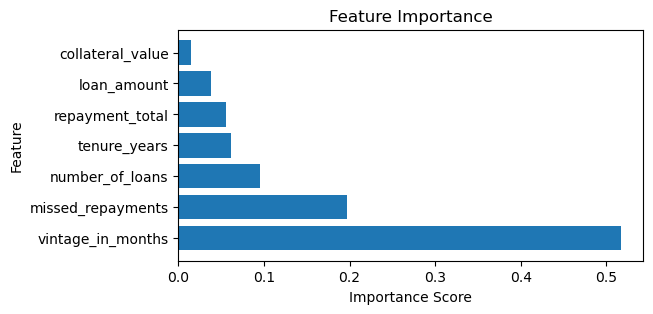

In [168]:
# Get feature importance scores
importance_scores = gb_best_model.feature_importances_

# Get feature names
feature_names = X_train.columns

# Create a sorted list of feature names and their importance scores
feature_importance = sorted(zip(feature_names, importance_scores), key=lambda x: x[1], reverse=True)

# Extract top 7 features and importance scores
top_features = [feature[0] for feature in feature_importance[:7]]
top_scores = [feature[1] for feature in feature_importance[:7]]

# Plot feature importance
plt.figure(figsize=(6, 3))
plt.barh(top_features, top_scores)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

### Gradient boosting - Hyperparameter tuned model : Prediction on unseen data

In [169]:
# Make predictions on the test data
y_pred_new = gb_best_model.predict(X_test_new)

In [170]:
# Model evaluation on unseen data
print('Summary : Gradient boosting - Hyperparameter tuned')
print('Predicted mean_squared_error: ' ,mean_squared_error(y_test_new, y_pred_new))
print('Predicted R-Score: ' ,r2_score(y_test_new, y_pred_new))

Summary : Gradient boosting - Hyperparameter tuned
Predicted mean_squared_error:  0.003661327295142409
Predicted R-Score:  0.935795460886945


In [173]:
pip install xgboost


     ---------------------------------------- 99.8/99.8 MB 2.5 MB/s eta 0:00:00


### XGBoost : Model training & evaluation

In [174]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Convert the data into DMatrix format (optimized data structure for XGBoost)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)

# Set the hyperparameters for XGBoost
params = {
    'objective': 'reg:squarederror',  # Use squared error for regression
    'eta': 0.1,  # Learning rate
    'max_depth': 3,  # Maximum depth of each tree
    'subsample': 0.8,  # Subsample ratio of the training instances
    'colsample_bytree': 0.8  # Subsample ratio of columns when constructing each tree
}

# Train the XGBoost model
num_rounds = 100  # Number of boosting rounds
xgb_model = xgb.train(params, dtrain, num_rounds)

# Make predictions on the test data
y_pred = xgb_model.predict(dtest)

# Evaluate the model using mean squared error
print('Train mean_squared_error: ' ,mean_squared_error(y_train,y_train_pred))
print('Test mean_squared_error: ' ,mean_squared_error(y_test, y_pred))
print('Train R-Score: ' ,r2_score(y_train,y_train_pred))
print('Test R-Score: ' ,r2_score(y_test, y_pred))

Train mean_squared_error:  0.005496786584044251
Test mean_squared_error:  0.0067891612280549084
Train R-Score:  0.9049987672418884
Test R-Score:  0.8815776946717457


### XGBoost : Prediction on the unseen data set

In [176]:
# Make predictions on the test data
dtest_new = xgb.DMatrix(X_test_new)
y_pred_new = xgb_model.predict(dtest_new)

In [177]:
# Model evaluation on unseen data
print('Summary : XGBoost')
print('Predicted mean_squared_error: ' ,mean_squared_error(y_test_new, y_pred_new))
print('Predicted R-Score: ' ,r2_score(y_test_new, y_pred_new))

Summary : XGBoost
Predicted mean_squared_error:  0.005760890859178114
Predicted R-Score:  0.8989777988477383


### XGBoost : Hyperparameter tuning

In [178]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Create an XGBoost model
xgb_model = xgb.XGBRegressor()

# Define the hyperparameters and their potential values for tuning. 
# The final tuned parameters are: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}
param_grid = {
    'learning_rate': [0.1],
    'n_estimators': [300],
    'max_depth': [7]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
xgb_best_params = grid_search.best_params_
xgb_best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = xgb_best_model.predict(X_test)

# Evaluate the model using mean squared error

print('Test mean_squared_error: ' ,mean_squared_error(y_test, y_pred))
print('Test R-Score: ' ,r2_score(y_test, y_pred))

Test mean_squared_error:  0.004564869483868938
Test R-Score:  0.9203756768113703


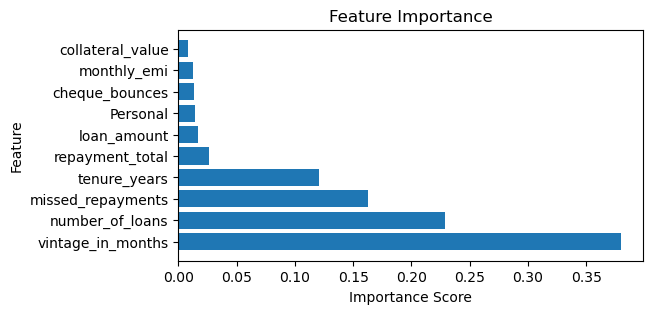

In [179]:
# Get feature importance scores
importance_scores = xgb_best_model.feature_importances_

# Get feature names
feature_names = X_train.columns

# Create a sorted list of feature names and their importance scores
feature_importance = sorted(zip(feature_names, importance_scores), key=lambda x: x[1], reverse=True)

# Extract top 10 features and importance scores
top_features = [feature[0] for feature in feature_importance[:10]]
top_scores = [feature[1] for feature in feature_importance[:10]]

# Plot feature importance
plt.figure(figsize=(6, 3))
plt.barh(top_features, top_scores)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

### XGBoost - Hyperparameter tuned : Prediction on the unseen data set

In [181]:
# Make predictions on the test data
y_pred_new = xgb_best_model.predict(X_test_new)

In [182]:
# Model evaluation on unseen data
print('Summary : XGBoost - Hyperparameter tuned')
print('Predicted mean_squared_error: ' ,mean_squared_error(y_test_new, y_pred_new))
print('Predicted R-Score: ' ,r2_score(y_test_new, y_pred_new))

Summary : XGBoost - Hyperparameter tuned
Predicted mean_squared_error:  0.003203483421755699
Predicted R-Score:  0.9438241489847093


### Random Forest Reggressor : Model training & evaluation

In [183]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate sample regression data
#X, y = make_regression(n_samples=100, n_features=4, random_state=42)

# Split the data into training and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
print('Train mean_squared_error: ' ,mean_squared_error(y_train,y_train_pred))
print('Test mean_squared_error: ' ,mean_squared_error(y_test, y_pred))
print('Train R-Score: ' ,r2_score(y_train,y_train_pred))
print('Test R-Score: ' ,r2_score(y_test, y_pred))

Train mean_squared_error:  0.005496786584044251
Test mean_squared_error:  0.005191586699319837
Train R-Score:  0.9049987672418884
Test R-Score:  0.9094439438697647


### Random Forest Reggressor : Prediction on the unseen data set

In [184]:
# Make predictions on the test data
y_pred_new = rf_regressor.predict(X_test_new)

In [185]:
# Model evaluation on unseen data
print('Summary : Random Forest Reggressor')
print('Predicted mean_squared_error: ' ,mean_squared_error(y_test_new, y_pred_new))
print('Predicted R-Score: ' ,r2_score(y_test_new, y_pred_new))

Summary : Random Forest Reggressor
Predicted mean_squared_error:  0.005277130516664794
Predicted R-Score:  0.9074609546348348


### Random Forest Reggressor : Hyperparameter tuning

In [186]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from scipy.stats import randint

# Create a Random Forest Regressor model
#rf_regressor = RandomForestRegressor(random_state=42)

rf_regressor = RandomForestRegressor(n_estimators=463, max_depth=15, min_samples_split=4, min_samples_leaf=1, max_features='auto', random_state=42)

# Define the hyperparameters and their potential values for tuning
# The final tuned parameters for Random forest regressor are: 
# {'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 463}
#param_dist = {
#    'n_estimators': 463,
#    'max_depth': 15,
#    'min_samples_split': 4,
#    'min_samples_leaf': 1,
#    'max_features': 'auto'
#}

# Perform random search with cross-validation
#random_search = RandomizedSearchCV(estimator=rf_regressor, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
#random_search.fit(X_train, y_train)
 
rf_regressor.fit(X_train, y_train)

# Get the best hyperparameters and model
#rf_best_params = random_search.best_params_
#rf_best_model = random_search.best_estimator_

# Make predictions on the test set using the best model
#y_pred = rf_best_model.predict(X_test)

y_pred = rf_regressor.predict(X_test)
# Evaluate the model

print('Train mean_squared_error: ' ,mean_squared_error(y_train,y_train_pred))
print('Test mean_squared_error: ' ,mean_squared_error(y_test, y_pred))
print('Train R-Score: ' ,r2_score(y_train,y_train_pred))
print('Test R-Score: ' ,r2_score(y_test, y_pred))

Train mean_squared_error:  0.005496786584044251
Test mean_squared_error:  0.005284362748764021
Train R-Score:  0.9049987672418884
Test R-Score:  0.907825665368876


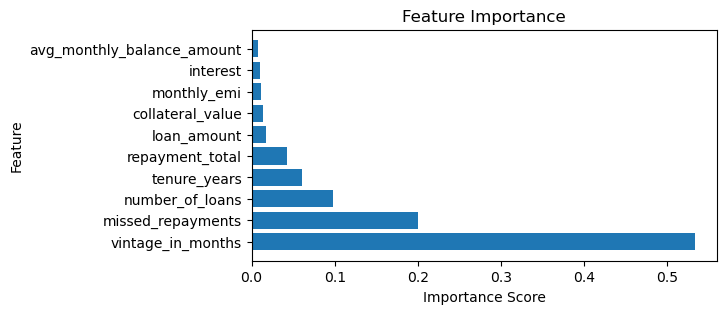

In [187]:
# Get feature importance scores
importance_scores = rf_regressor.feature_importances_

# Get feature names
feature_names = X_train.columns

# Create a sorted list of feature names and their importance scores
feature_importance = sorted(zip(feature_names, importance_scores), key=lambda x: x[1], reverse=True)

# Extract top 10 features and importance scores
top_features = [feature[0] for feature in feature_importance[:10]]
top_scores = [feature[1] for feature in feature_importance[:10]]

# Plot feature importance
plt.figure(figsize=(6, 3))
plt.barh(top_features, top_scores)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

### Random Forest Regressor - Hyperparameter tuned : Prediction on the unseen data set

In [188]:
# Make predictions on the test data
y_pred_new = rf_regressor.predict(X_test_new)

In [189]:
# Model evaluation on unseen data
print('Summary : Random Forest Reggressor')
print('Predicted mean_squared_error: ' ,mean_squared_error(y_test_new, y_pred_new))
print('Predicted R-Score: ' ,r2_score(y_test_new, y_pred_new))

Summary : Random Forest Reggressor
Predicted mean_squared_error:  0.00537885154863304
Predicted R-Score:  0.9056771884076825


### Model Summary

In [192]:
r2_data = pd.DataFrame({'ML Model:':['Multiple Linear Regression', 'Multiple Linear Regression with RFE', "Gradient Boosting Regressor","Gradient Boosting Regressor - Hyperparameter tuned", "XGBoost Regressor", "XGBoost Regressor - Hyperparameter tuned", "Random Forest Regressor", "Random Forest Regressor - Hyperparameter tuned"], 
                          'R Square' :[0.9056,0.8022,0.9006,0.9354,0.8989,0.9438,0.9074,0.9056]})

In [193]:
print(r2_data)

                                           ML Model:  R Square
0                         Multiple Linear Regression    0.9056
1                Multiple Linear Regression with RFE    0.8022
2                        Gradient Boosting Regressor    0.9006
3  Gradient Boosting Regressor - Hyperparameter t...    0.9354
4                                  XGBoost Regressor    0.8989
5           XGBoost Regressor - Hyperparameter tuned    0.9438
6                            Random Forest Regressor    0.9074
7     Random Forest Regressor - Hyperparameter tuned    0.9056
